# EU_Social_Progress_Index_2024

Fuente: Comisión Europea https://commission.europa.eu/index_en

https://composite-indicators.jrc.ec.europa.eu/explorer

https://composite-indicators.jrc.ec.europa.eu/explorer/explorer/indices/eu-r-spi/eu-regional-social-progress-index

In [1]:
!pip install mapclassify
!pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import requests
import datetime
import geopandas as gpd


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Lectura del dataset



In [3]:
path = 'Datasets/EU-SPI 2.0_2024_raw_data.xlsx'

df = pd.read_excel(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 48 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             242 non-null    object 
 1   NUTS code                                                           242 non-null    object 
 2   RegionName                                                          242 non-null    object 
 3   Infant mortality                                                    242 non-null    float64
 4   Satisfaction with water quality                                     236 non-null    float64
 5   Uncollected sewage                                                  242 non-null    float64
 6   Sewage treatment, additional                                        242 non-null    float64
 7   Safety at night  

## Lectura de datos espaciales

Fuente: Eurostat

https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/territorial-units-statistics


In [6]:
# Cargar los shapefiles de las regiones NUTS
shapefile_path = 'NUTS_RG_20M_2021_3035.shp'
gdf = gpd.read_file(shapefile_path)

In [7]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NUTS_ID     2010 non-null   object  
 1   LEVL_CODE   2010 non-null   int32   
 2   CNTR_CODE   2010 non-null   object  
 3   NAME_LATN   2010 non-null   object  
 4   NUTS_NAME   2010 non-null   object  
 5   MOUNT_TYPE  2009 non-null   float64 
 6   URBN_TYPE   2010 non-null   int32   
 7   COAST_TYPE  2010 non-null   int32   
 8   FID         2010 non-null   object  
 9   geometry    2010 non-null   geometry
dtypes: float64(1), geometry(1), int32(3), object(5)
memory usage: 133.6+ KB


## GDP

* **Gross domestic product *per capita* at current market prices by NUTS 2 regions [nama_10r_2gdp]**

https://ec.europa.eu/eurostat/databrowser/view/nama_10r_2gdp/default/table?lang=en

Unit of measure [UNIT]: Euro per inhabitant [EUR_HAB]


In [8]:
path = 'Datasets/gdp_pp.xlsx'
gdp_pp = pd.read_excel(path)

gdp_pp.head()

GEO (Codes)                                       GEO (Labels)   2000  \
0   EU27_2020          European Union - 27 countries (from 2020)  18400   
1          BE                                            Belgium  25000   
2         BE1  Région de Bruxelles-Capitale/Brussels Hoofdste...      :   
3        BE10  Région de Bruxelles-Capitale/Brussels Hoofdste...      :   
4         BE2                                      Vlaams Gewest      :   

    2001   2002   2003   2004   2005   2006   2007   2008   2009   2010  \
0  19200  19900  20300  21200  22000  23200  24600  25300  24100  24900   
1  25700  26400  27100  28500  29600  30800  32300  32800  32100  33300   
2      :      :  54900  57400  58700  60600  62200  61800  60900  62500   
3      :      :  54900  57400  58700  60600  62200  61800  60900  62500   
4      :      :  26800  28100  29300  30700  32400  32900  32000  33200   

    2011   2012   2013   2014   2015   2016   2017   2018   2019   2020  \
0  25700  25800  26000  26600  27500  28200  29300  30300  31300  30100   
1  34100  34800  35200  36000  37000  38000  39100  40300  41700  39900   
2  62200  63300  63400  64500  66100  66700  68400  69600  71700  68300   
3  62200  63300  63400  64500  66100  66700  68400  69600  71700  68300   
4  34100  34900  35400  36200  37400  38600  39800  40900  42200  40600   

    2021   2022  
0  32700  35400  
1  43800  47400  
2  73400  77800  
3  73400  77800  
4  45200  49000

In [9]:
gdp_pp.replace(':', np.nan, inplace=True)

In [10]:
gdp_pp_data = gdp_pp[['GEO (Codes)','2022']]

gdp_pp_data = gdp_pp_data.copy()
gdp_pp_data.rename(columns={'2022': 'gdp_per_capita_2022'}, inplace=True)

df = pd.merge(df, gdp_pp_data, how='left', left_on='NUTS code', right_on='GEO (Codes)')

df = df.drop(columns = 'GEO (Codes)')


## Análisis Exploratorio

El dataset cuenta con:

- 242 entradas: regiones de UE
- 49 columnas, de las cuales 1 es el PIB per cápita y 3 corresponden a información geográfica: país, región y código NUTS (identificador estándar)

In [11]:
df.shape

(242, 49)

Los tipos de datos parecen ser correctos

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 49 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             242 non-null    object 
 1   NUTS code                                                           242 non-null    object 
 2   RegionName                                                          242 non-null    object 
 3   Infant mortality                                                    242 non-null    float64
 4   Satisfaction with water quality                                     236 non-null    float64
 5   Uncollected sewage                                                  242 non-null    float64
 6   Sewage treatment, additional                                        242 non-null    float64
 7   Safety at night  

### Datos perdidos

No hay datos perdidos en las variables categoricas.

Alguos datos perdidos en los indicadores

En general pocos datos perdidos, no mas de un 3.5% por cada variable, excepto:

- Bathing water quality: 10%
- Share of low-achieving 15 year olds in reading (level 1a or lower): 7%

**[Figura 00.1]**

In [13]:
nan_count = df.isnull().sum()

nan_percentage = round((nan_count / len(df)) * 100, 2)

nan_summary = pd.DataFrame({
    'indicador': nan_count.index,
    'missing': nan_count.values,
    'proporcion': nan_percentage.values
})

nan_summary = nan_summary[nan_summary['missing'] > 0]
print("Figura 00.1")
print(nan_summary)

Figura 00.1
                                            indicador  missing  proporcion
4                     Satisfaction with water quality        6        2.48
7                                     Safety at night        6        2.48
8                                        Money Stolen        6        2.48
9                                    Assaulted/Mugged        6        2.48
11  Share of low-achieving 15 year olds in reading...       19        7.85
13                    Lower-secondary completion only        1        0.41
14                               Early school leavers        5        2.07
15                                  Broadband at home        1        0.41
16                   Digital skills above basic level        6        2.48
17         Online interaction with public authorities        1        0.41
18                                    Internet access        6        2.48
19                                   Freedom of media        6        2.48
20           

In [14]:
filtered_df = df[['Country', 'Bathing water quality', 'Share of low-achieving 15 year olds in reading (level 1a or lower)']]

grouped_df = filtered_df.groupby('Country')

nan_summary_list = []

for name, group in grouped_df:
    nan_count = group.isnull().sum()
    nan_percentage = round((nan_count / len(group)) * 100, 2)

    nan_summary = pd.DataFrame({
        'Country': name,
        'indicador': nan_count.index,
        'missing': nan_count.values,
        'proporcion': nan_percentage.values
    })

    nan_summary_list.append(nan_summary)

nan_summary_final = pd.concat(nan_summary_list)
nan_summary_final = nan_summary_final[nan_summary_final['missing'] > 0]

nan_summary_final


Country                                          indicador  missing  \
1      BE                              Bathing water quality        4   
1      BG                              Bathing water quality        4   
1      CZ                              Bathing water quality        1   
1      DE                              Bathing water quality        2   
1      EL                              Bathing water quality        1   
1      ES                              Bathing water quality        1   
2      ES  Share of low-achieving 15 year olds in reading...       19   
1      HR                              Bathing water quality        1   
1      HU                              Bathing water quality        1   
1      IT                              Bathing water quality        1   
1      RO                              Bathing water quality        7   
1      SE                              Bathing water quality        1   
1      SK                              Bathing water quality        2   

   proporcion  
1       36.36  
1       66.67  
1       12.50  
1        5.26  
1        7.69  
1        5.26  
2      100.00  
1       25.00  
1       12.50  
1        4.76  
1       87.50  
1       12.50  
1       50.00

Los datos perdidos de "Bathing water quality" están repartidos entre paises, sin embargo el 100% de perdidos de "Share of low-achieving 15 year olds in reading..." están en España.

Comprobamos que el indicador "Share of low-achieving 15 year olds in reading (level 1a or lower)" no tiene datos para España

In [15]:
df[df['Country']=="ES"]['Share of low-achieving 15 year olds in reading (level 1a or lower)']


92    NaN
93    NaN
94    NaN
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN
100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
105   NaN
106   NaN
107   NaN
108   NaN
109   NaN
110   NaN
Name: Share of low-achieving 15 year olds in reading (level 1a or lower), dtype: float64

Comprobamos si existe algún indicador más con todos los datos perdidos en algún pais:

**[Figura 00.2]**

In [16]:
missing_all_by_country = {}

# Obtener la lista de países únicos
paises = df['Country'].unique()

# Iterar sobre cada país
for pais in paises:
    # Filtrar el DataFrame por el país actual
    df_pais = df[df['Country'] == pais]

    # Encontrar las variables con todos los datos perdidos para este país
    variables_con_todos_perdidos = df_pais.columns[df_pais.isnull().all()].tolist()

    # Guardar el resultado en el diccionario
    missing_all_by_country[pais] = variables_con_todos_perdidos

print("Figura 00.2")
print()
# Mostrar el resultado
for pais, variables in missing_all_by_country.items():
    print(f"País: {pais}, Variables con todos los datos perdidos: {variables}")

Figura 00.2

País: AT, Variables con todos los datos perdidos: []
País: BE, Variables con todos los datos perdidos: []
País: BG, Variables con todos los datos perdidos: []
País: CY, Variables con todos los datos perdidos: ['Digital skills above basic level']
País: CZ, Variables con todos los datos perdidos: []
País: DE, Variables con todos los datos perdidos: []
País: DK, Variables con todos los datos perdidos: []
País: EE, Variables con todos los datos perdidos: ['Digital skills above basic level']
País: EL, Variables con todos los datos perdidos: []
País: ES, Variables con todos los datos perdidos: ['Share of low-achieving 15 year olds in reading (level 1a or lower)']
País: FI, Variables con todos los datos perdidos: []
País: FR, Variables con todos los datos perdidos: []
País: HR, Variables con todos los datos perdidos: []
País: HU, Variables con todos los datos perdidos: []
País: IE, Variables con todos los datos perdidos: []
País: IT, Variables con todos los datos perdidos: []
Paí

### Estadísticas descriptivas

**[Figura 00.3]**

In [17]:
round(df.describe(),2)

Infant mortality  Satisfaction with water quality  Uncollected sewage  \
count            242.00                           236.00              242.00   
mean               3.21                            82.34                2.40   
std                1.45                             9.38                7.91   
min                0.00                            43.41                0.00   
25%                2.30                            76.93                0.00   
50%                3.00                            83.31                0.00   
75%                3.70                            88.85                0.00   
max                9.70                            99.91               55.56   

       Sewage treatment, additional  Safety at night  Money Stolen  \
count                        242.00           236.00        236.00   
mean                          84.30            75.53          7.98   
std                           23.34             7.63          2.75   
min                            0.00            55.53          1.84   
25%                           79.33            71.18          6.12   
50%                           95.71            75.89          7.83   
75%                           99.46            80.92          9.86   
max                          100.00            92.74         15.13   

       Assaulted/Mugged  Traffic deaths  \
count            236.00          242.00   
mean               3.12           48.38   
std                1.82           24.06   
min                0.57            0.00   
25%                1.55           32.00   
50%                2.82           43.00   
75%                4.22           60.00   
max                8.14          159.00   

       Share of low-achieving 15 year olds in reading (level 1a or lower)  \
count                                             223.00                    
mean                                               22.91                    
std                                                 6.98                    
min                                                11.05                    
25%                                                20.69                    
50%                                                20.94                    
75%                                                23.85                    
max                                                47.10                    

       Share of low-achieving 15 year olds in maths and science  \
count                                             242.00          
mean                                               45.24          
std                                                 9.01          
min                                                31.01          
25%                                                40.67          
50%                                                42.36          
75%                                                49.14          
max                                                71.05          

       Lower-secondary completion only  Early school leavers  \
count                           241.00                237.00   
mean                             19.70                  9.56   
std                              11.43                  4.45   
min                               1.50                  1.43   
25%                              12.30                  6.33   
50%                              17.50                  8.60   
75%                              25.70                 12.10   
max                              58.70                 26.03   

       Broadband at home  Digital skills above basic level  \
count             241.00                            236.00   
mean               89.49                             26.74   
std                 5.01                             10.00   
min                73.50                              6.88   
25%                86.72                             20.33   
50%                8

### Outliers

Outliers con Z-Score

El Z-score mide cuántas desviaciones estándar un dato se encuentra por encima o por debajo de la media de la distribución

Z = (X - μ)\σ

Un Z-score superior a 3 o inferior a -3 generalmente se considera un outlier

**[Figura 00.4]**

In [18]:
from scipy import stats

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

z_scores = np.abs(stats.zscore(df[num_cols]))
outliers = (z_scores > 3).any(axis=1)
outliers_df = df[outliers]

print("Figura 00.4")
print()
print(outliers_df)

Figura 00.4

    Country NUTS code                  RegionName  Infant mortality  \
20       BG      BG31               Severozapaden               7.1   
21       BG      BG32          Severen tsentralen               6.4   
22       BG      BG33              Severoiztochen               5.8   
23       BG      BG34                Yugoiztochen               9.6   
24       BG      BG41                 Yugozapaden               3.1   
25       BG      BG42           Yuzhen tsentralen               5.1   
73       DK      DK01                 Hovedstaden               2.9   
138      FR      FRY1                  Guadeloupe               9.7   
139      FR      FRY2                  Martinique               9.1   
140      FR      FRY3                      Guyane               8.0   
142      FR      FRY5                     Mayotte               8.8   
144      HR      HR03          Jadranska Hrvatska               4.2   
145      HR      HR05                 Grad Zagreb               

Outliers de cada variable en función de IQR

**[Figura 00.5]**

In [19]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers_summary = pd.DataFrame(columns=['Variable', 'Outliers', '% Outliers'])

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    num_outliers = outliers.shape[0]
    perc_outliers = round((num_outliers / df.shape[0]) * 100,2)

    outliers_summary = pd.concat([outliers_summary, pd.DataFrame({'Variable': [col], 'Outliers': [num_outliers], '% Outliers': [perc_outliers]})], ignore_index=True)

outliers_summary = outliers_summary[outliers_summary['Outliers'] > 0]
print("Figura 00.5")
print()
print(outliers_summary)

Figura 00.5

                                             Variable Outliers  % Outliers
0                                    Infant mortality       15        6.20
1                     Satisfaction with water quality        3        1.24
2                                  Uncollected sewage       59       24.38
3                        Sewage treatment, additional       21        8.68
4                                     Safety at night        5        2.07
7                                      Traffic deaths       11        4.55
8   Share of low-achieving 15 year olds in reading...       60       24.79
9   Share of low-achieving 15 year olds in maths a...       27       11.16
10                    Lower-secondary completion only        9        3.72
11                               Early school leavers        6        2.48
12                                  Broadband at home        5        2.07
13                   Digital skills above basic level       10        4.13
15          

Outliers por pais

**[Figura 00.6]**

In [20]:
country_column = 'Country'

outliers_summary = pd.DataFrame(columns=['Variable'] + df[country_column].unique().tolist())

for col in num_cols:
    outliers_data = {'Variable': col}

    for country in df[country_column].unique():
        df_country = df[df[country_column] == country]

        Q1 = df_country[col].quantile(0.25)
        Q3 = df_country[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_country[(df_country[col] < lower_bound) | (df_country[col] > upper_bound)]

        num_outliers = outliers.shape[0]

        outliers_data[country] = num_outliers

    outliers_summary = pd.concat([outliers_summary, pd.DataFrame(outliers_data, index=[0])], ignore_index=True)

styled_outliers_summary = outliers_summary.style.background_gradient(cmap='Reds', subset=pd.IndexSlice[:, outliers_summary.columns != 'Variable'])
print("Figura 00.6")
print()
styled_outliers_summary

Figura 00.6



**[Figura 00.7]**

Figura 00.7


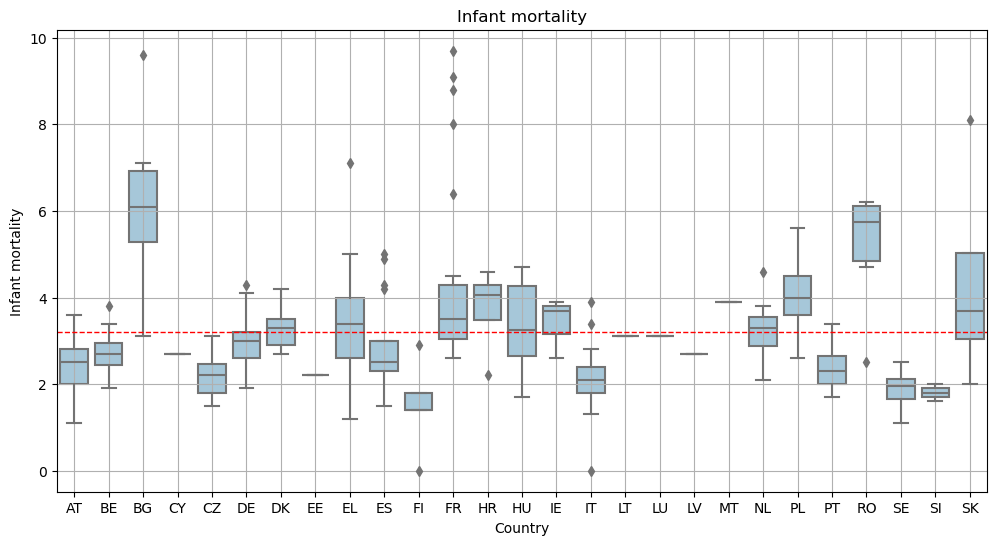

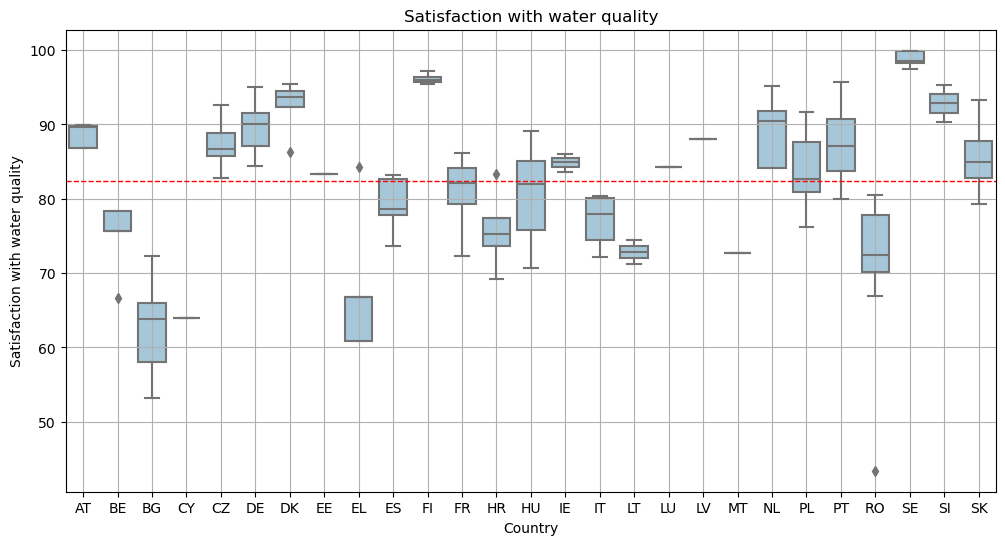

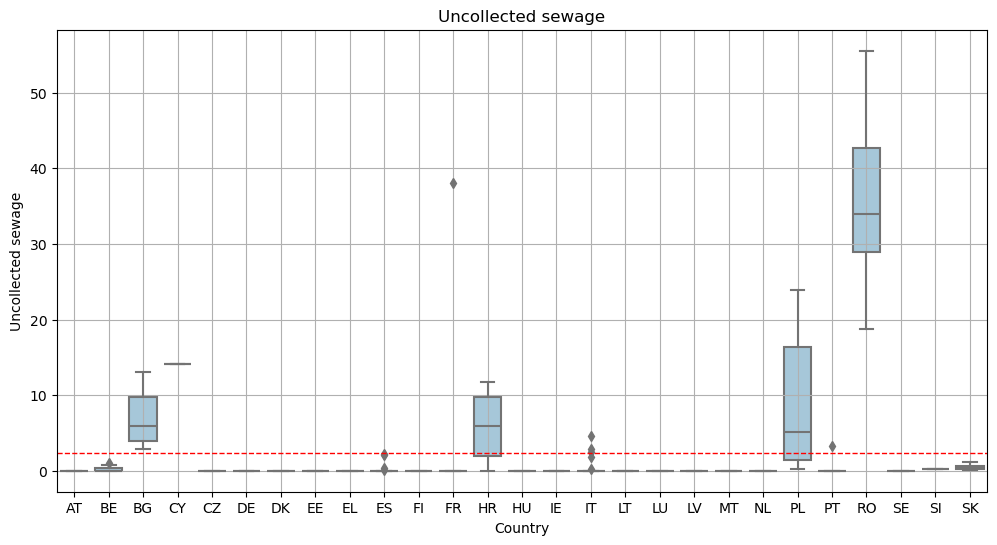

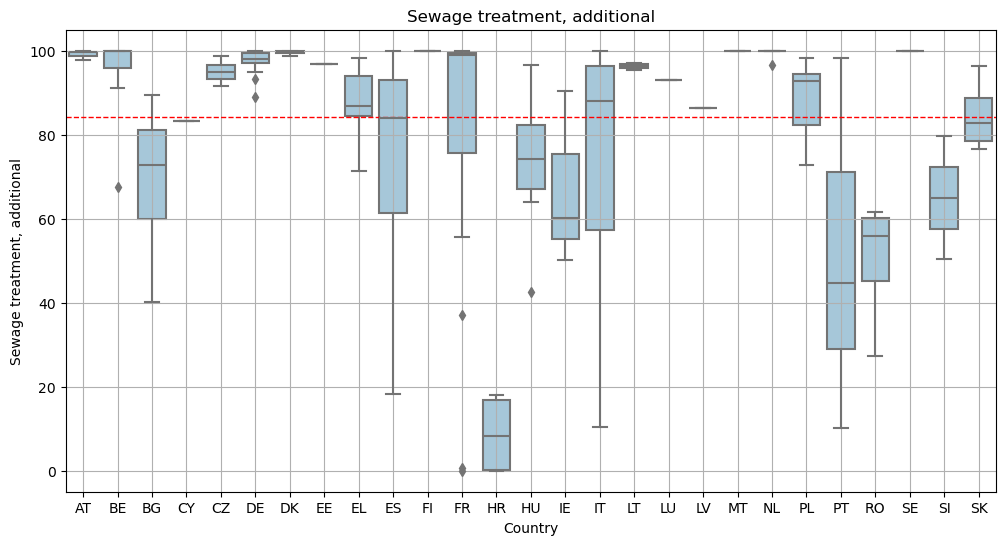

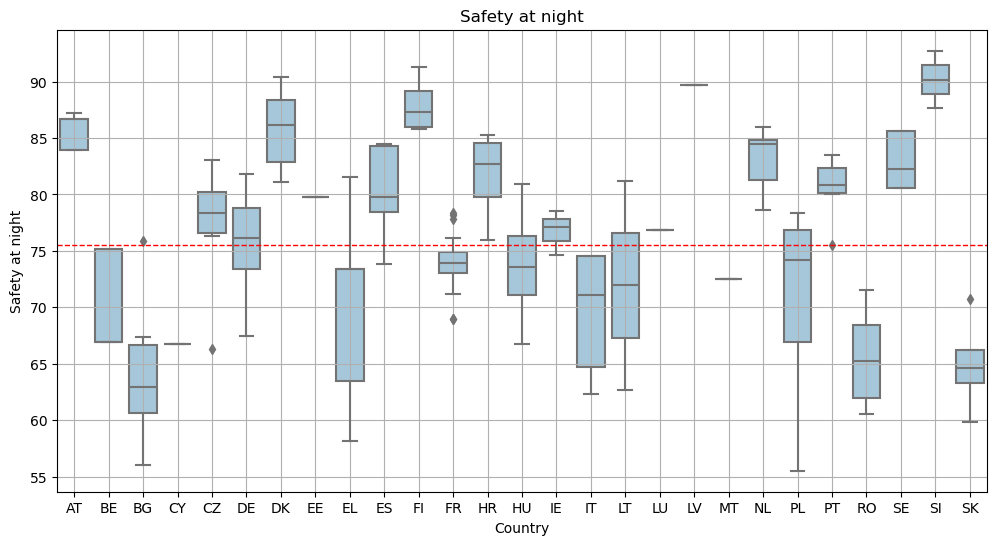

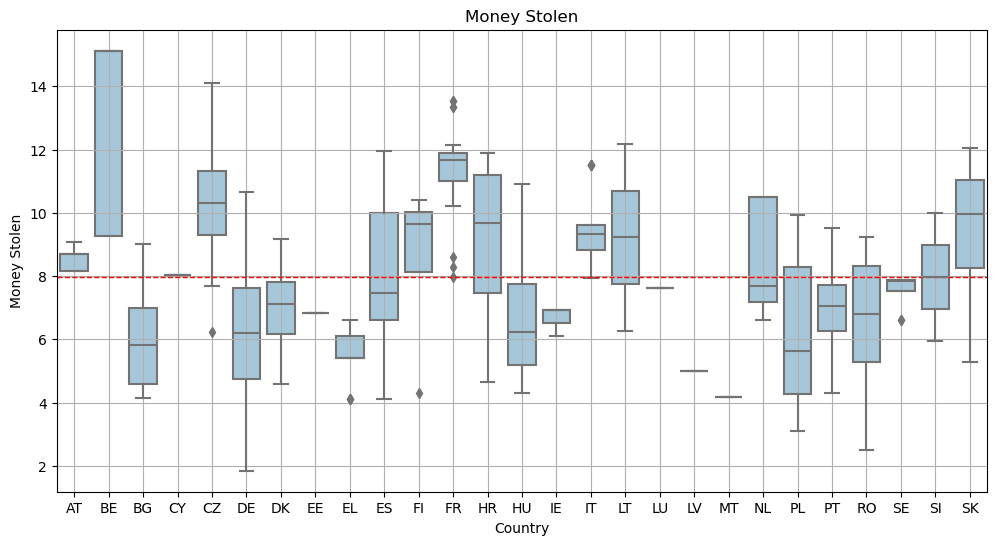

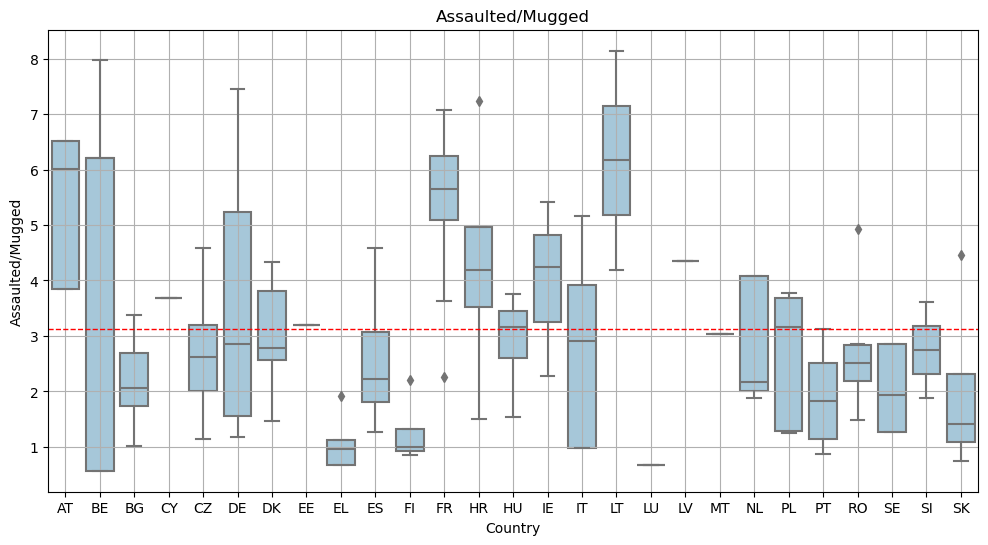

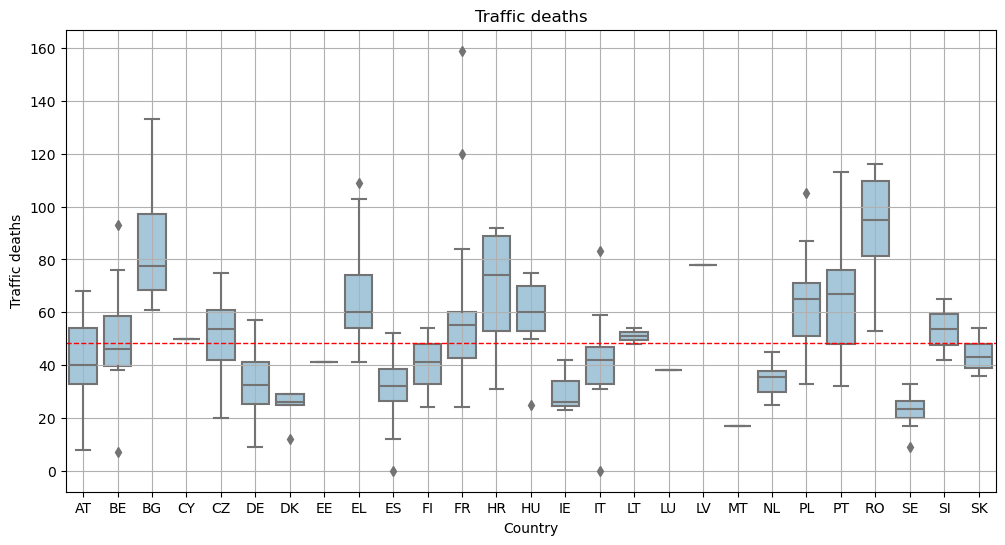

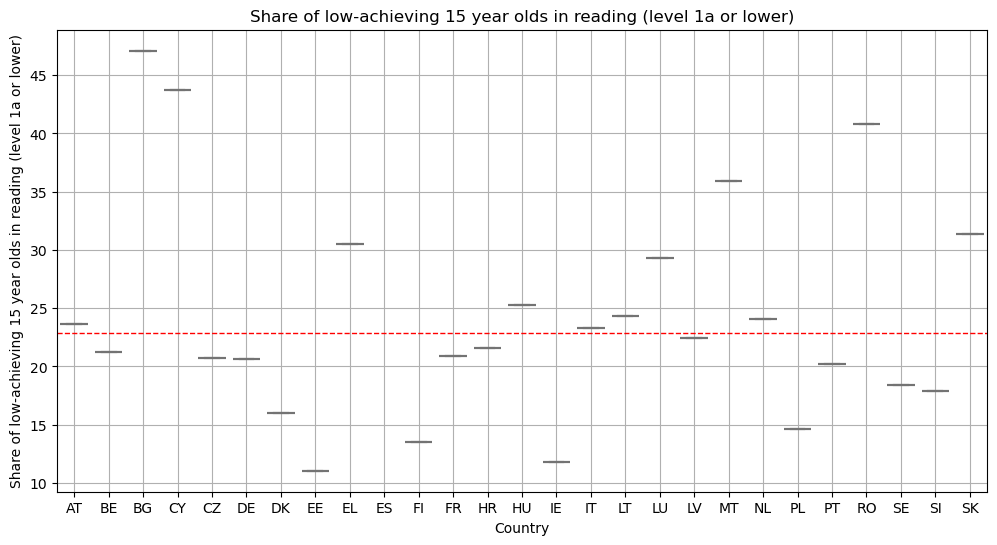

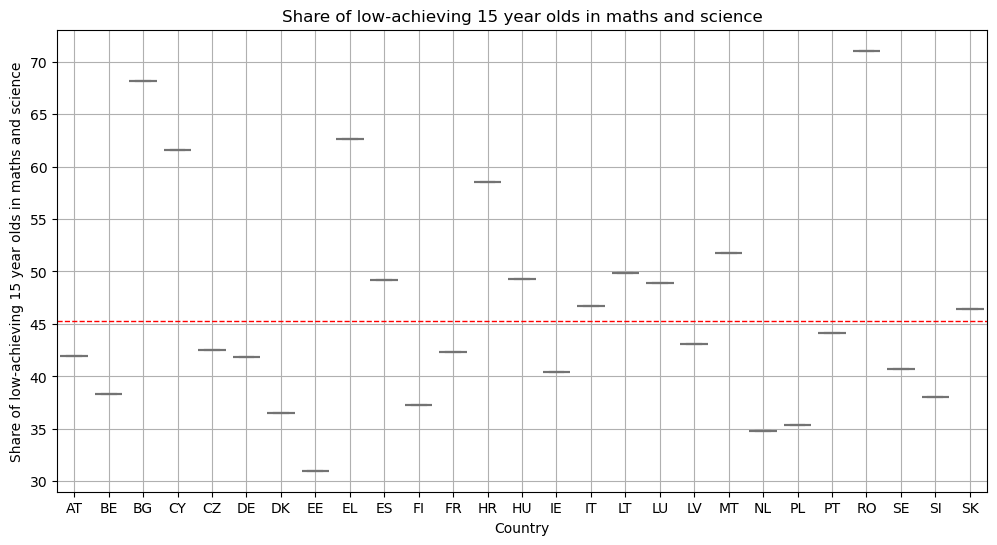

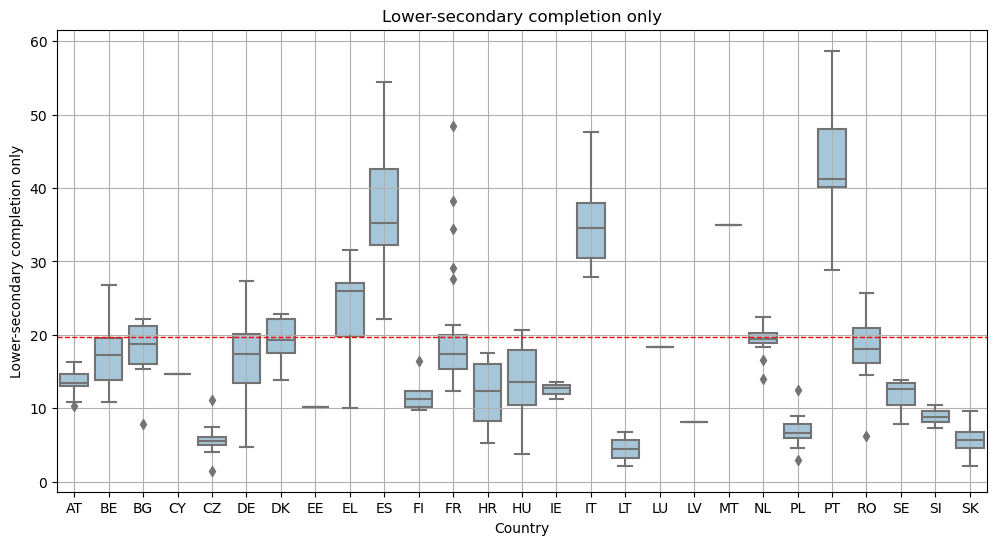

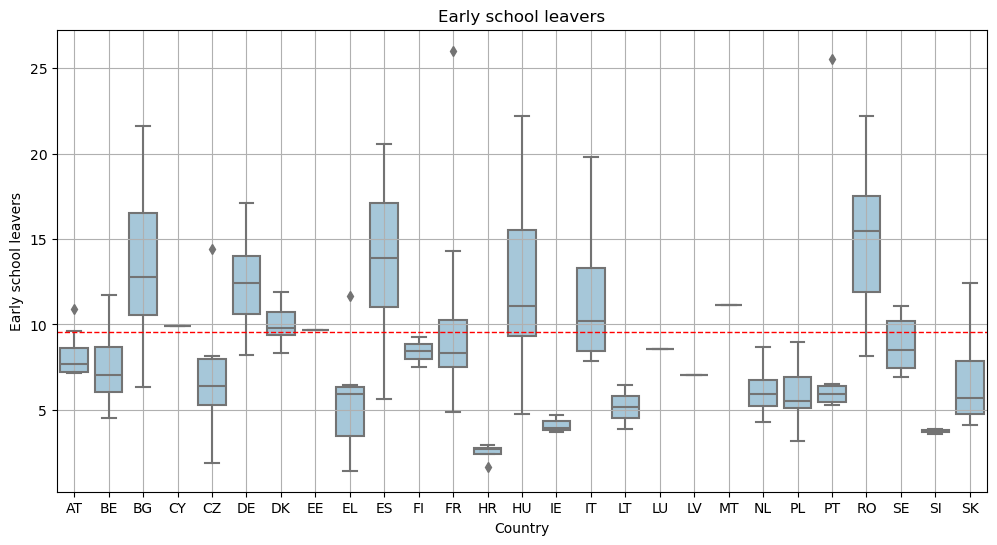

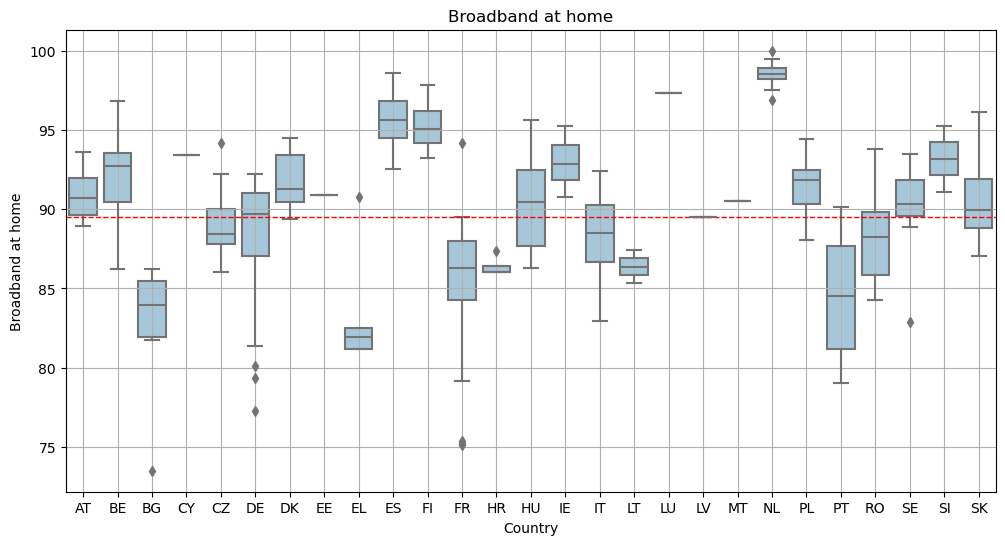

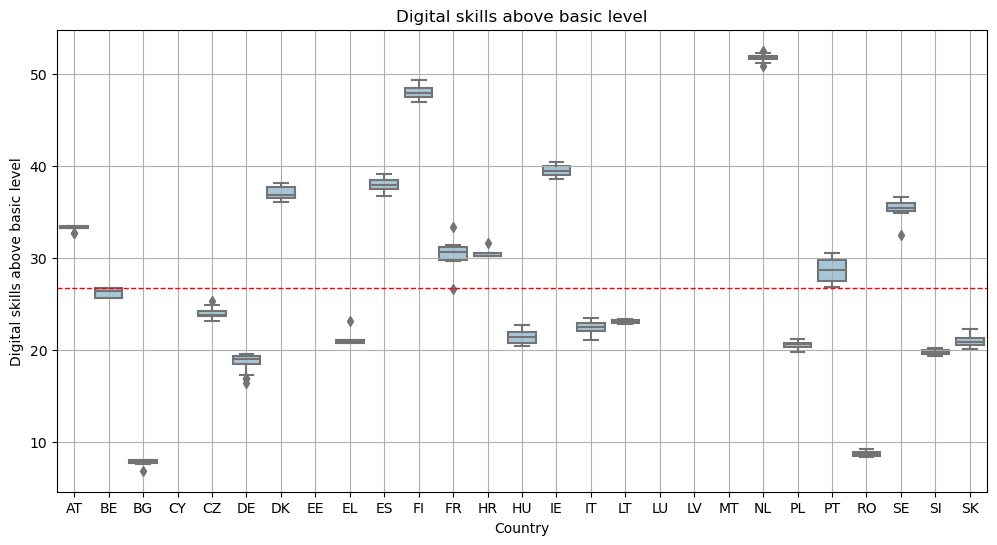

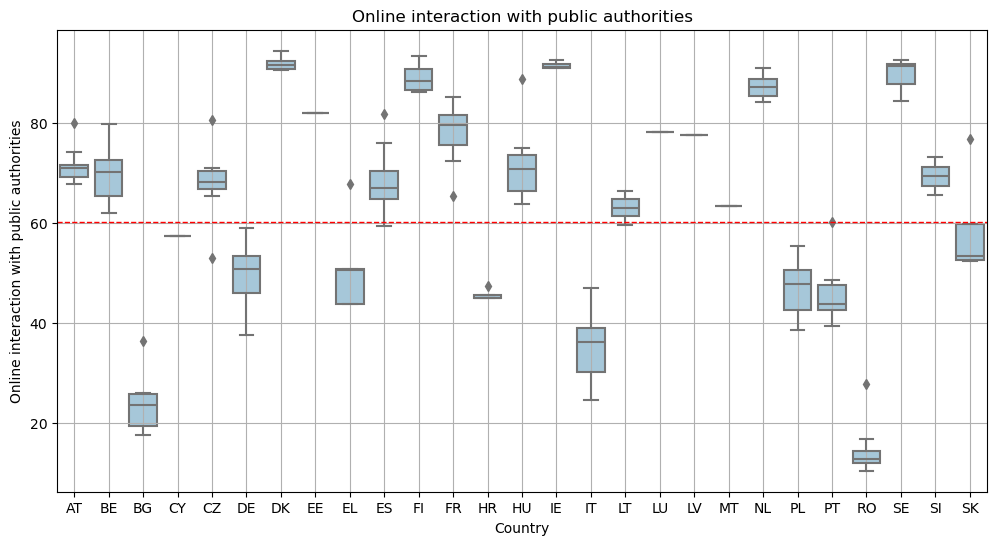

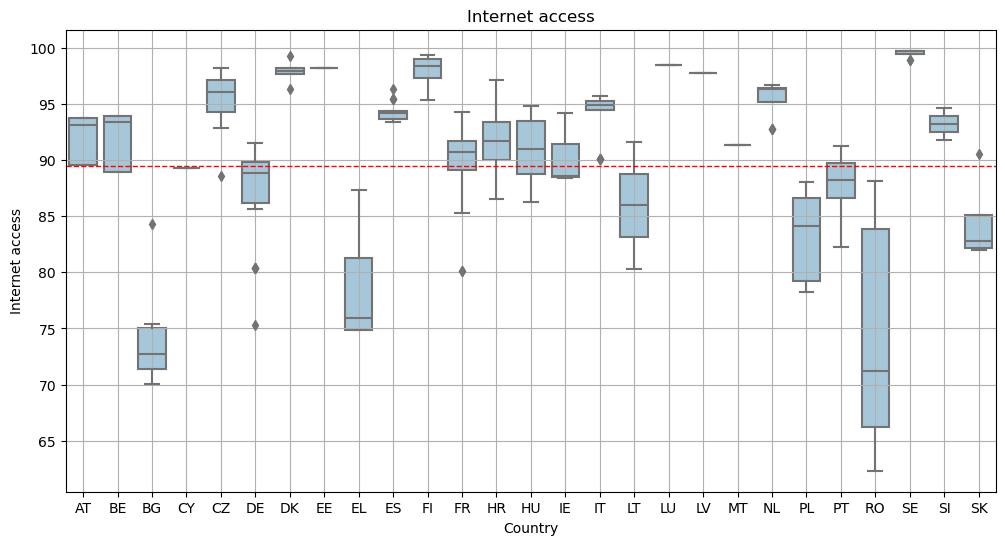

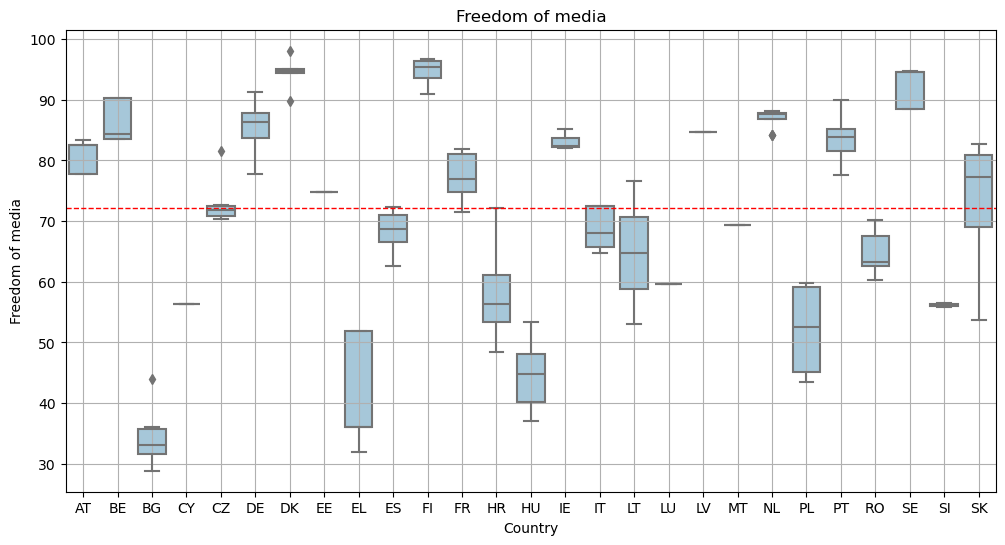

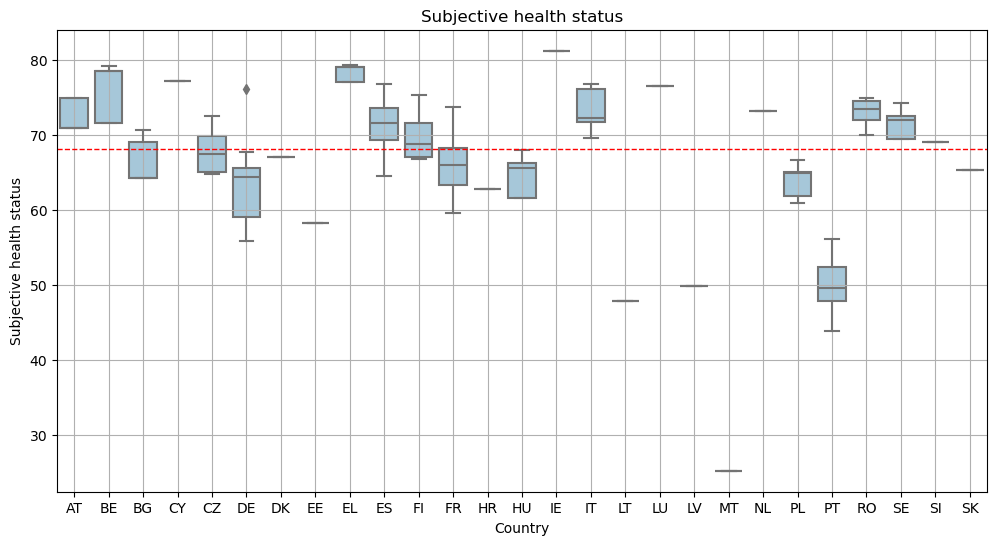

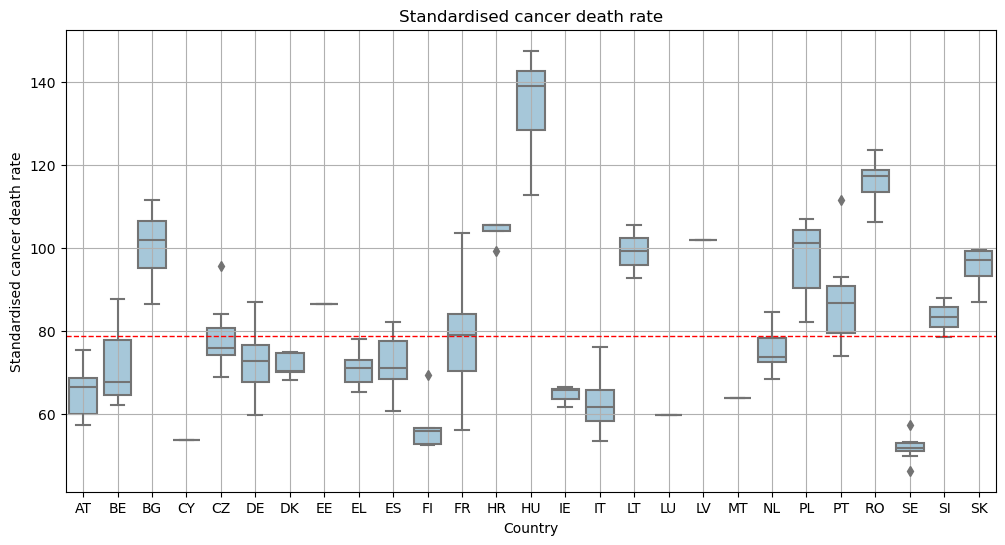

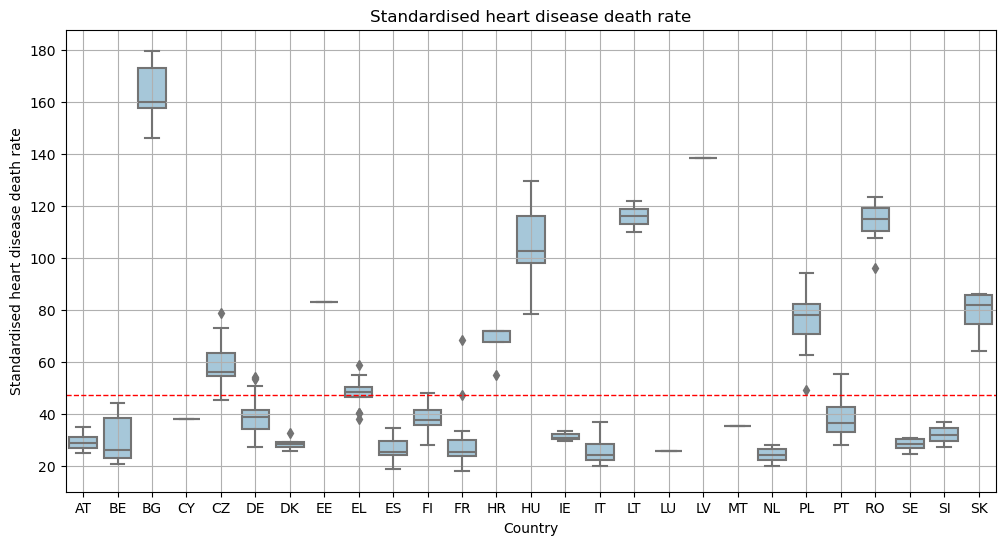

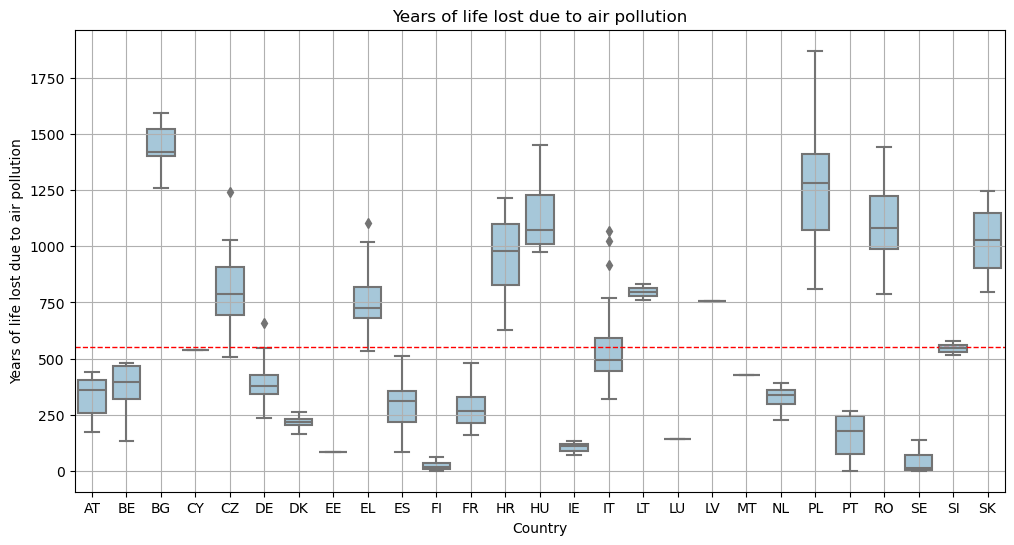

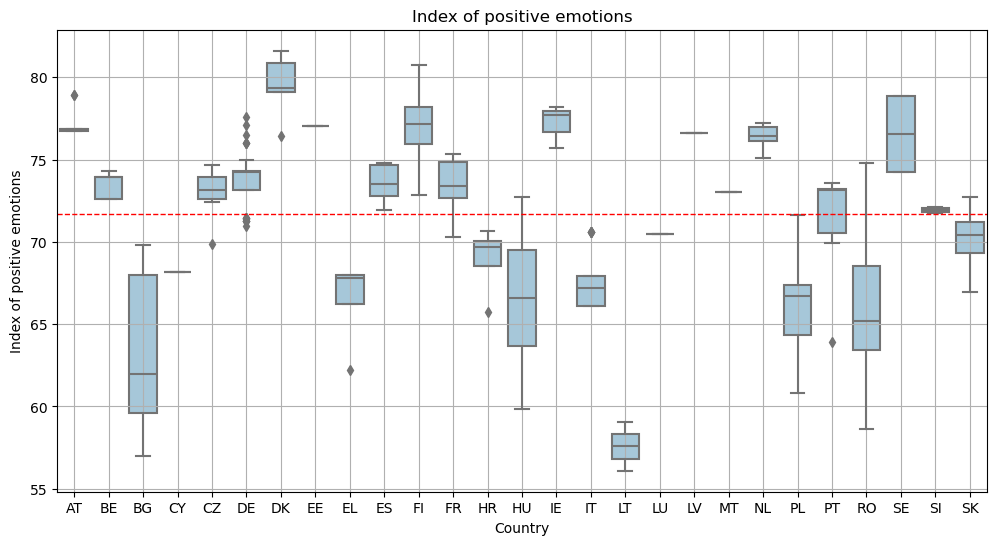

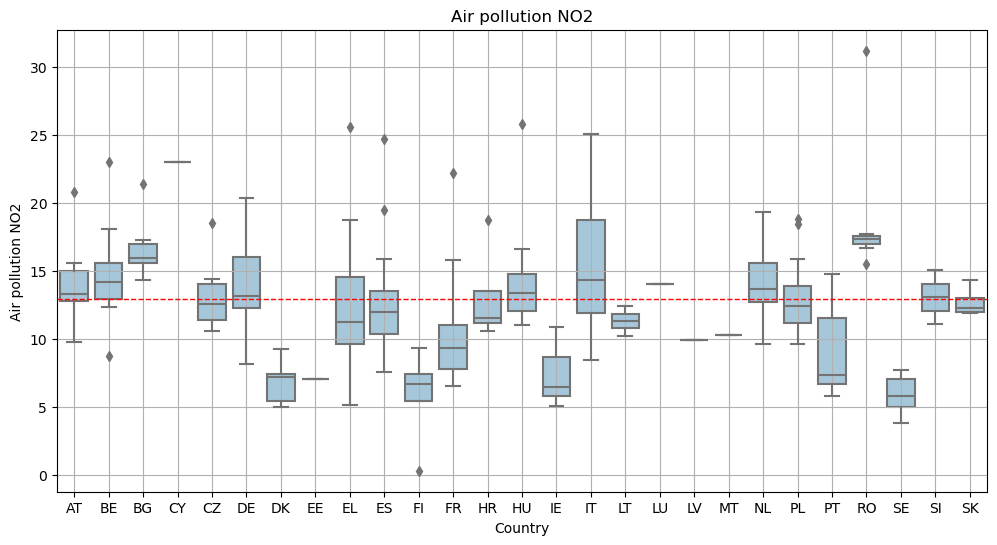

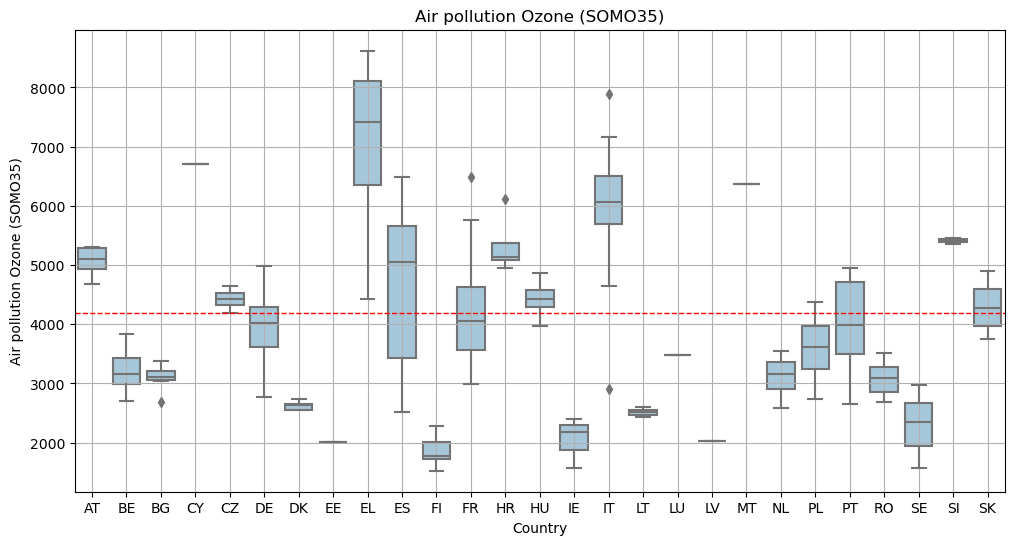

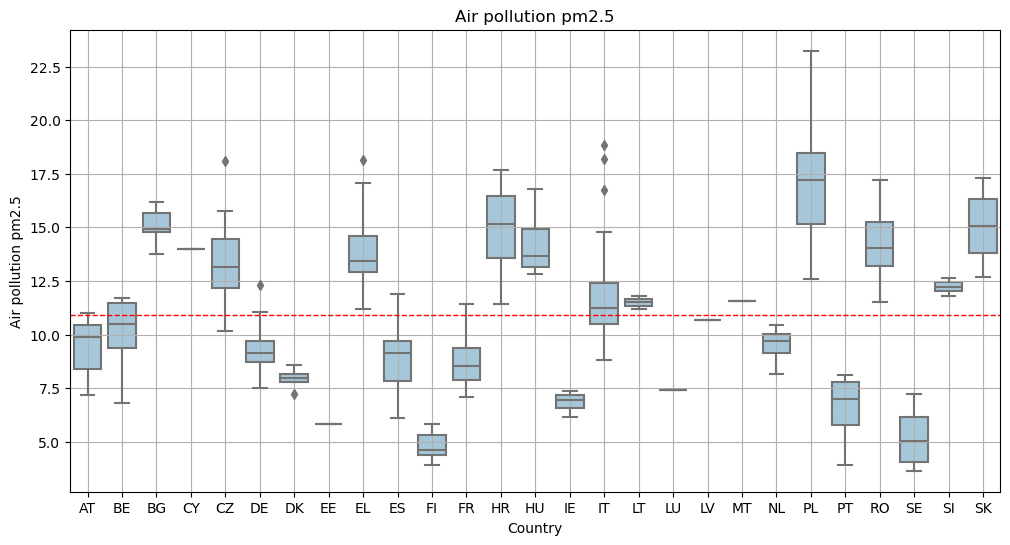

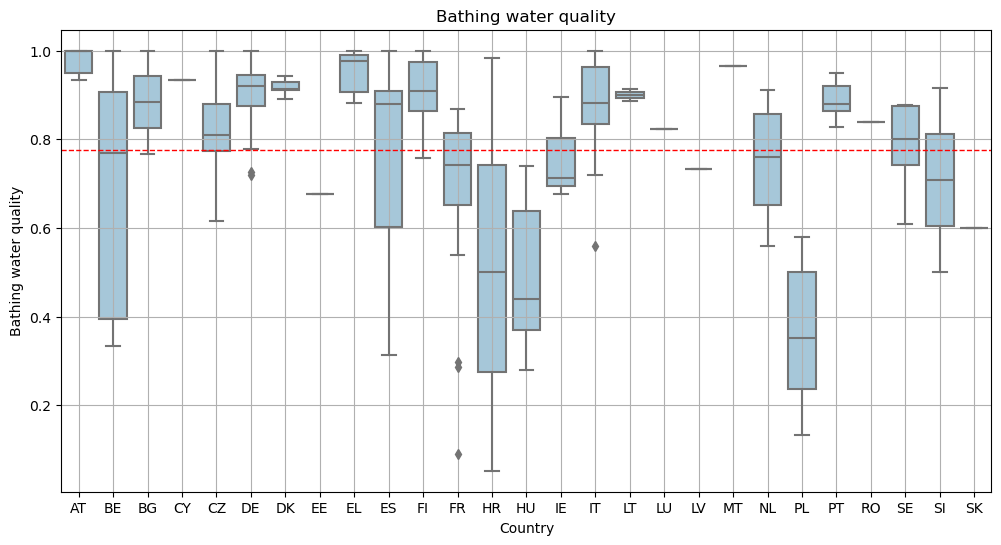

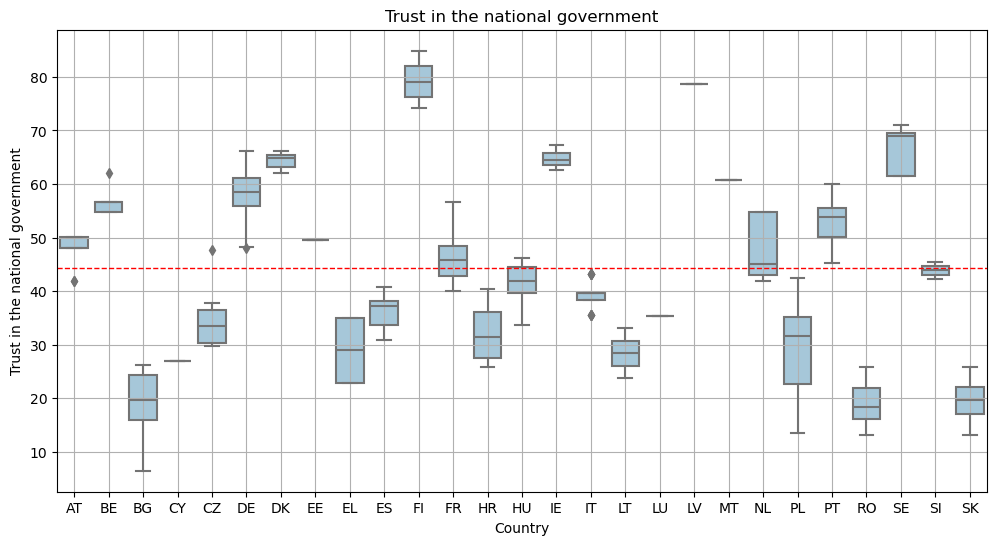

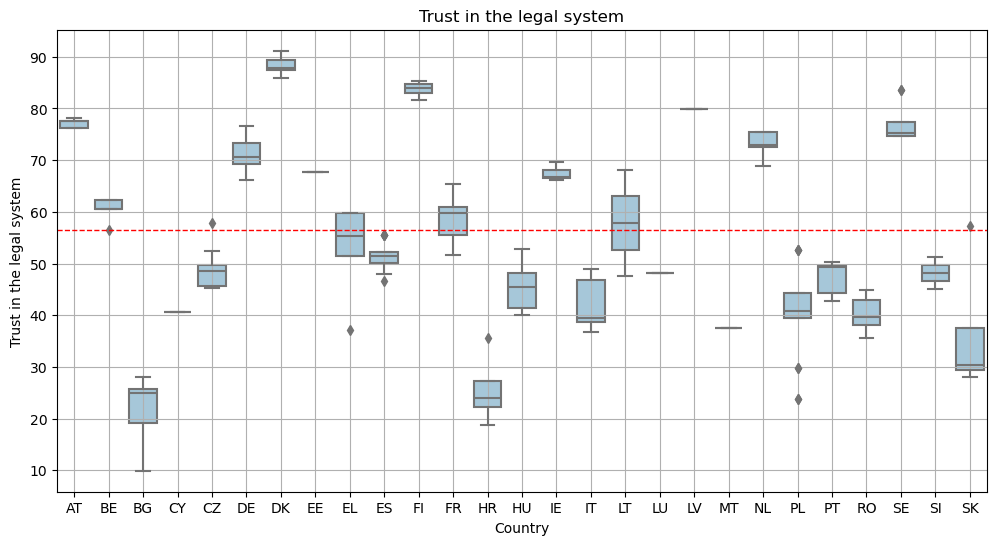

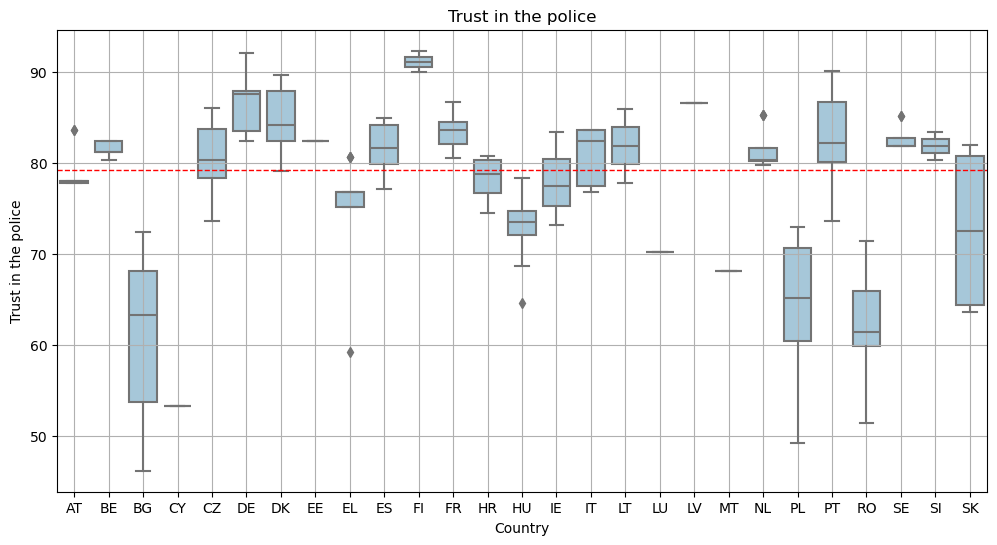

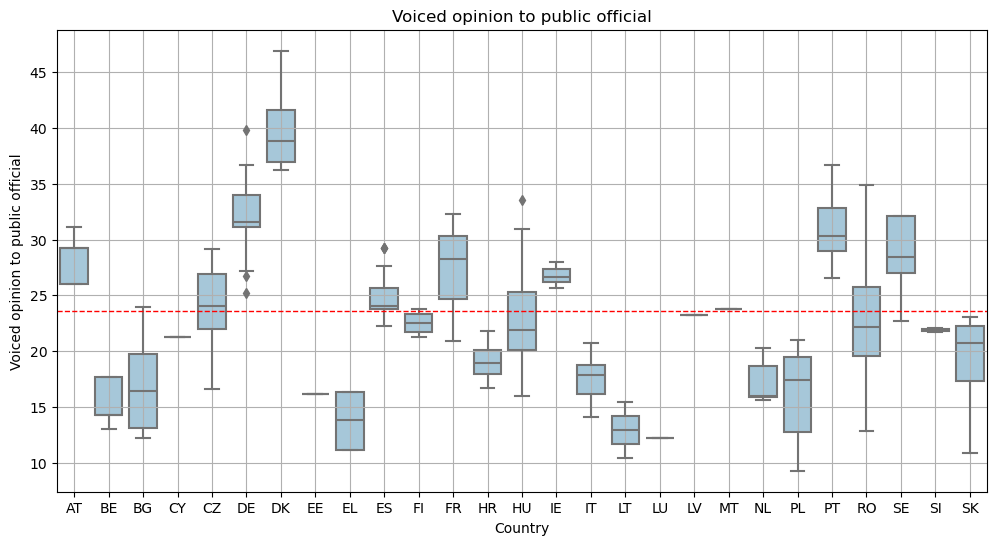

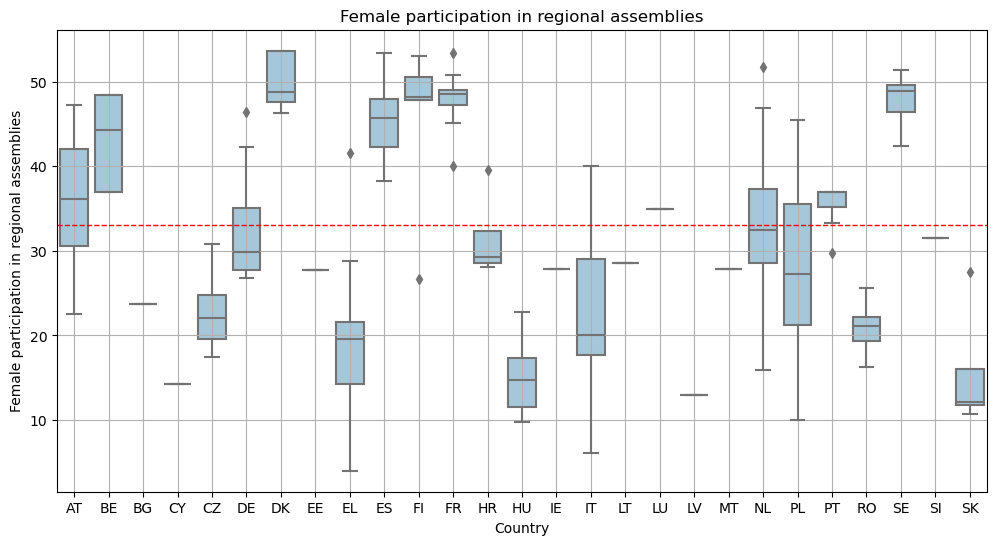

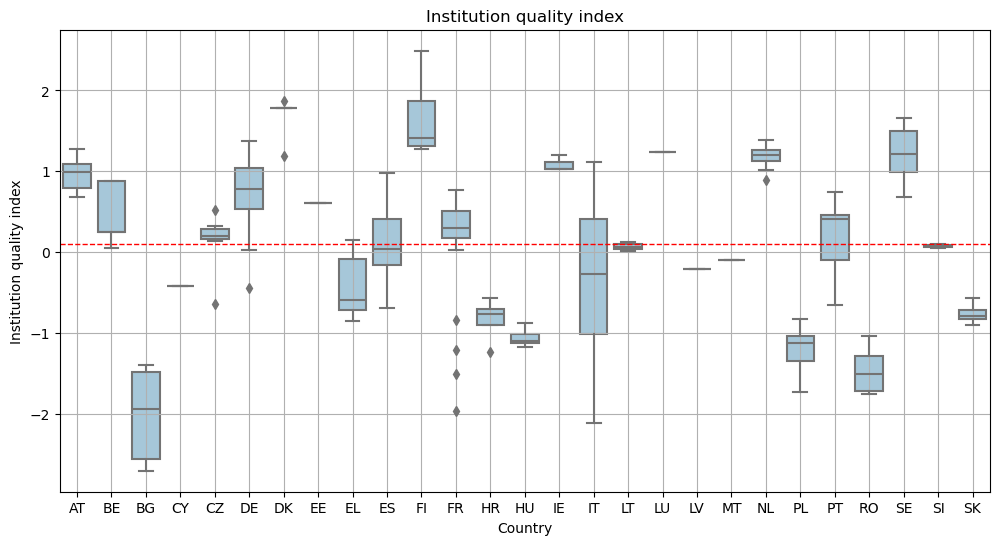

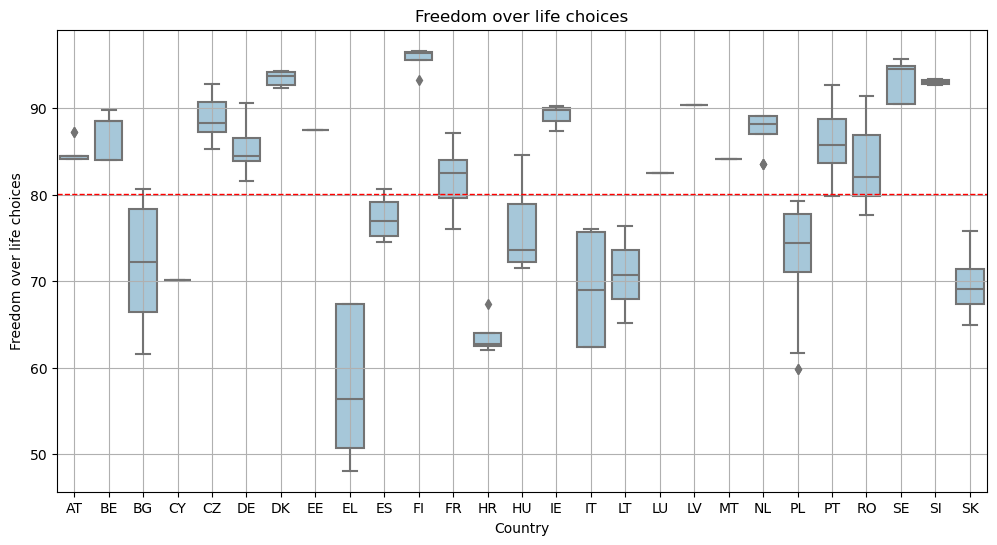

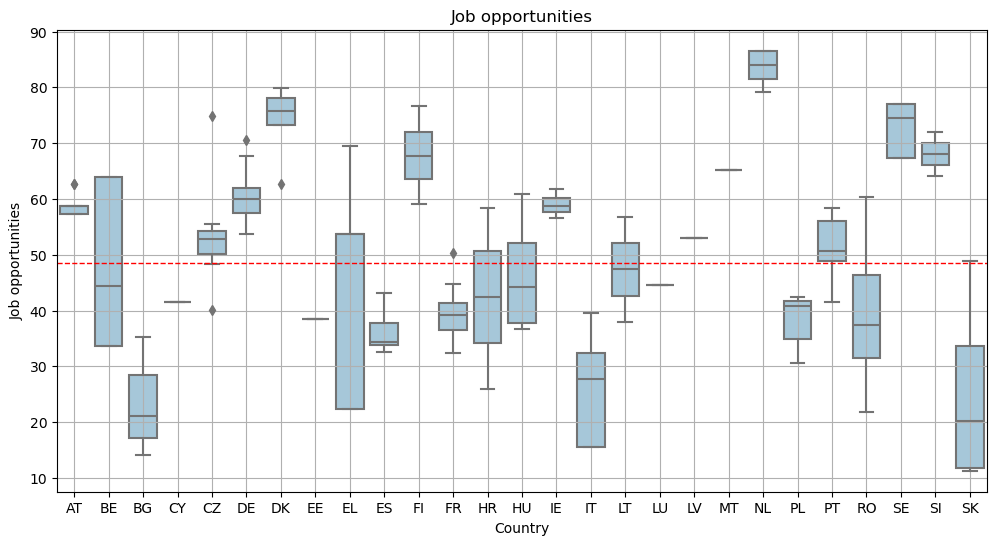

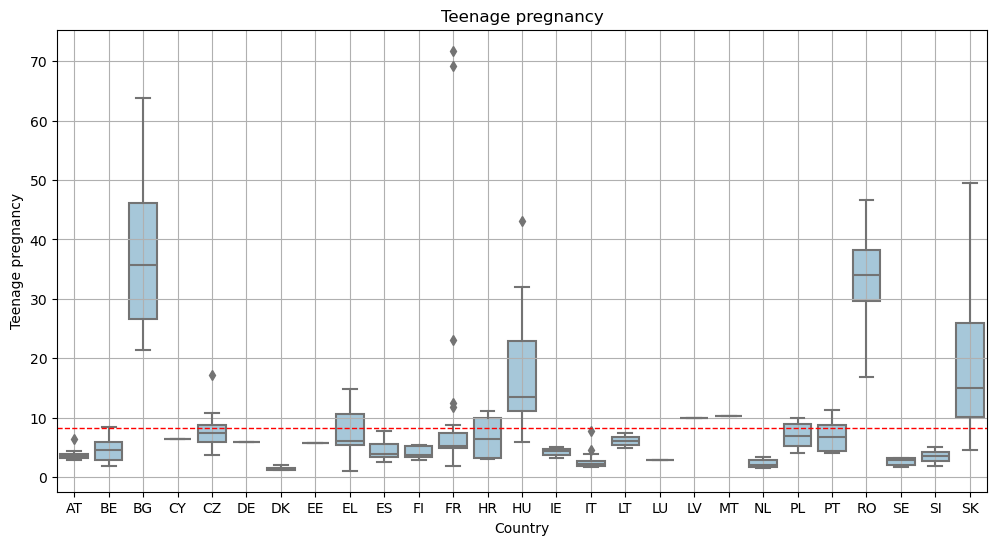

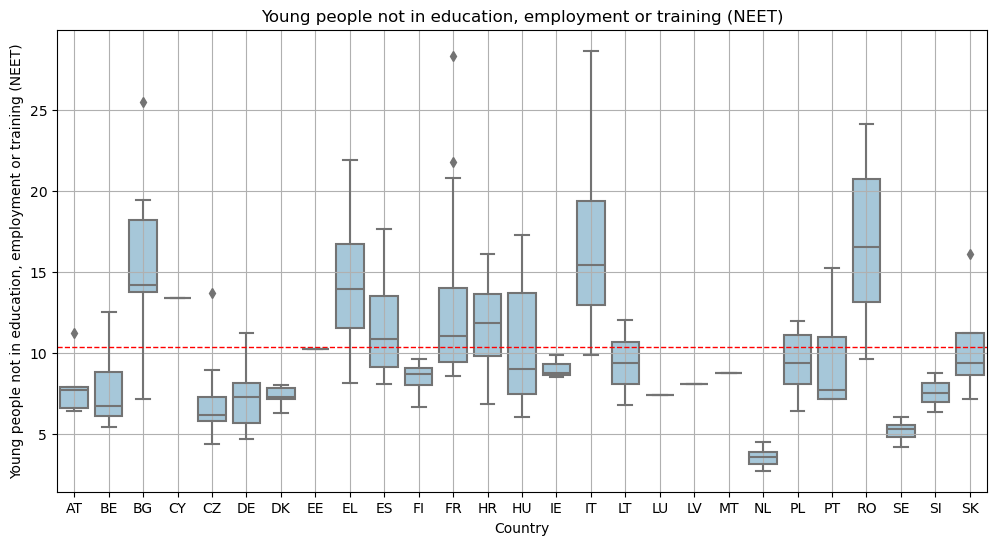

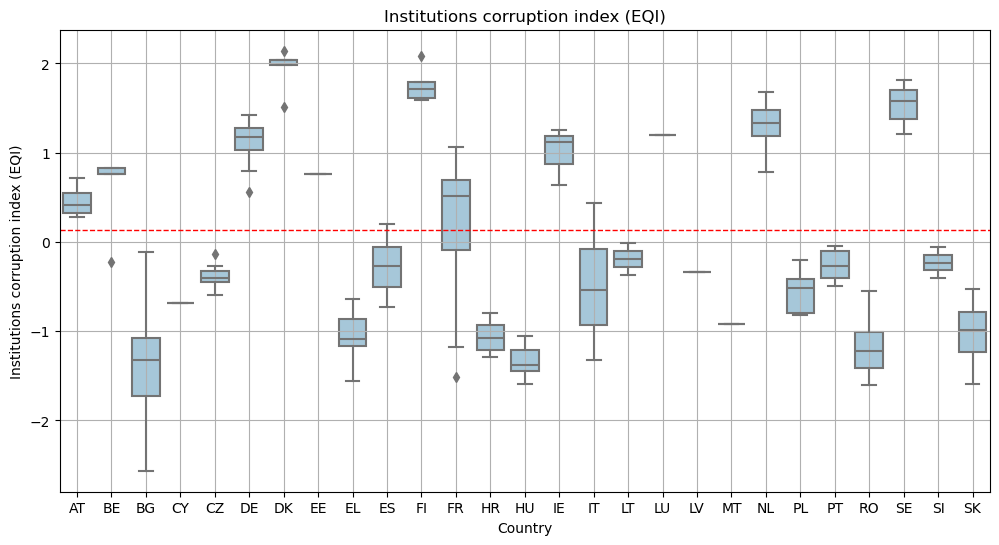

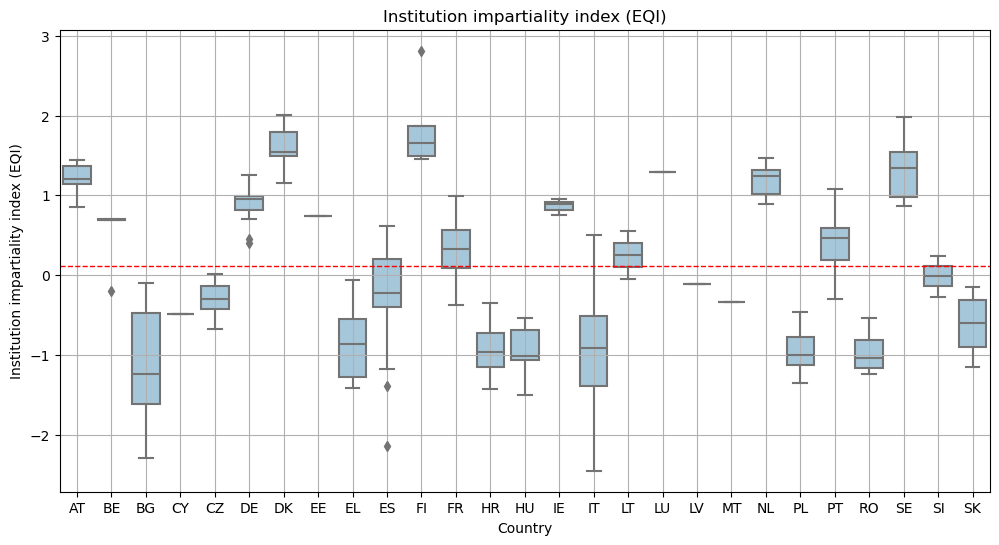

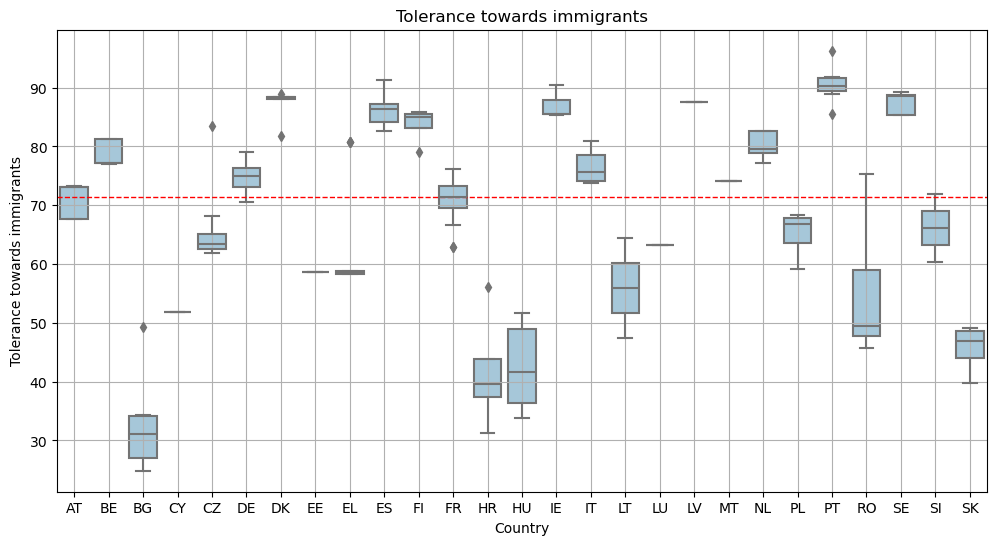

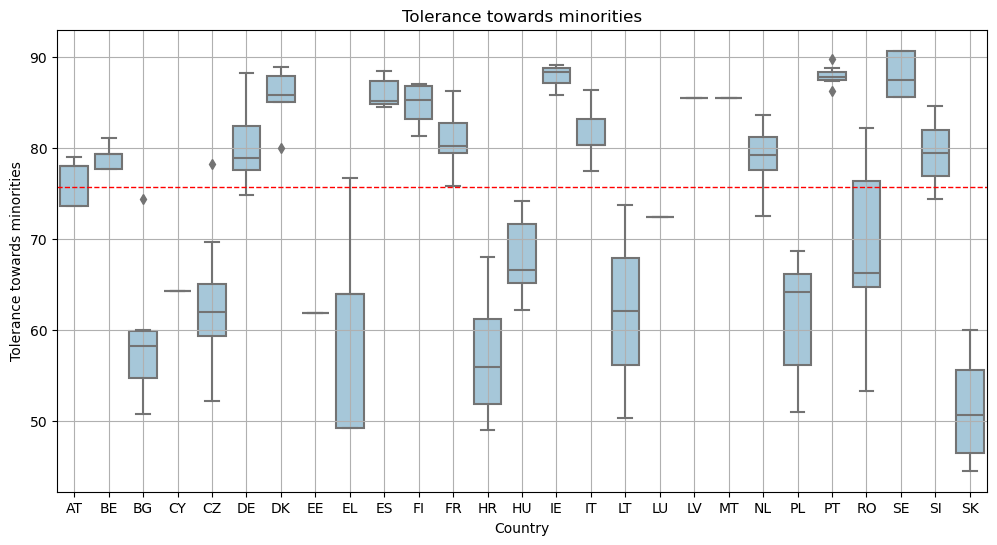

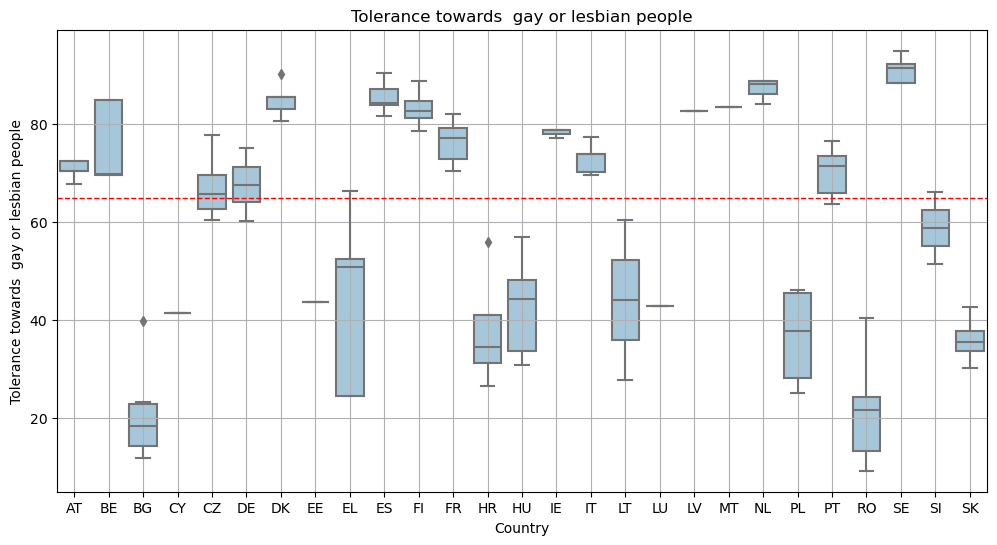

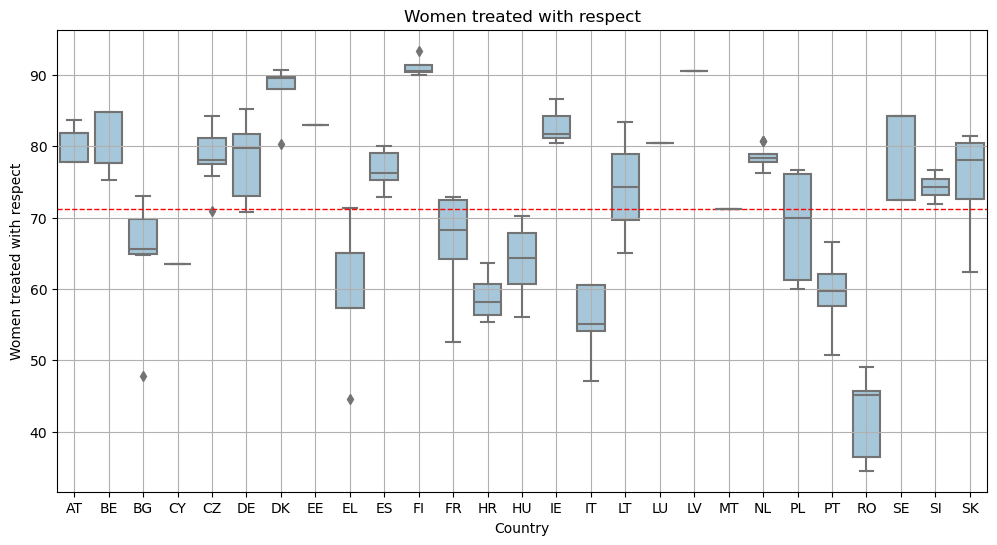

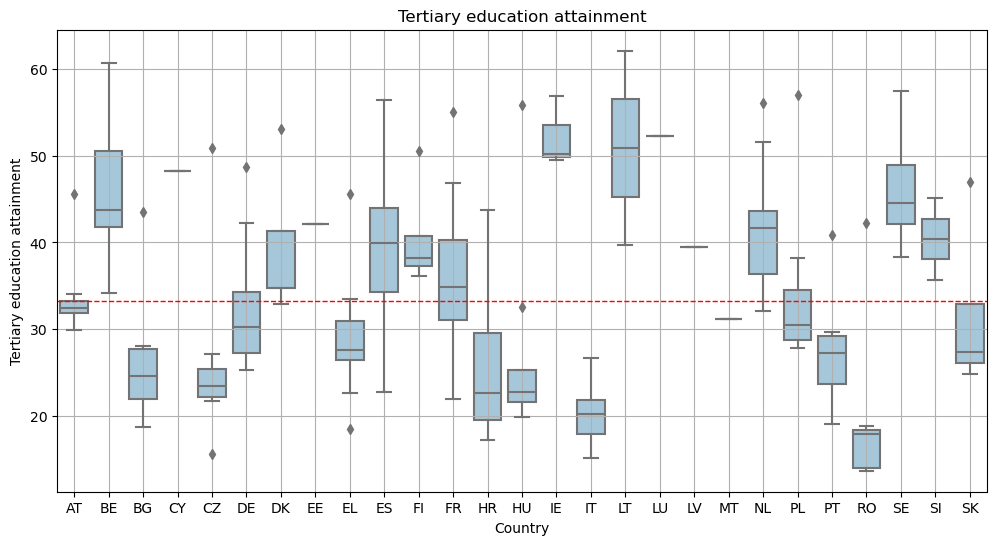

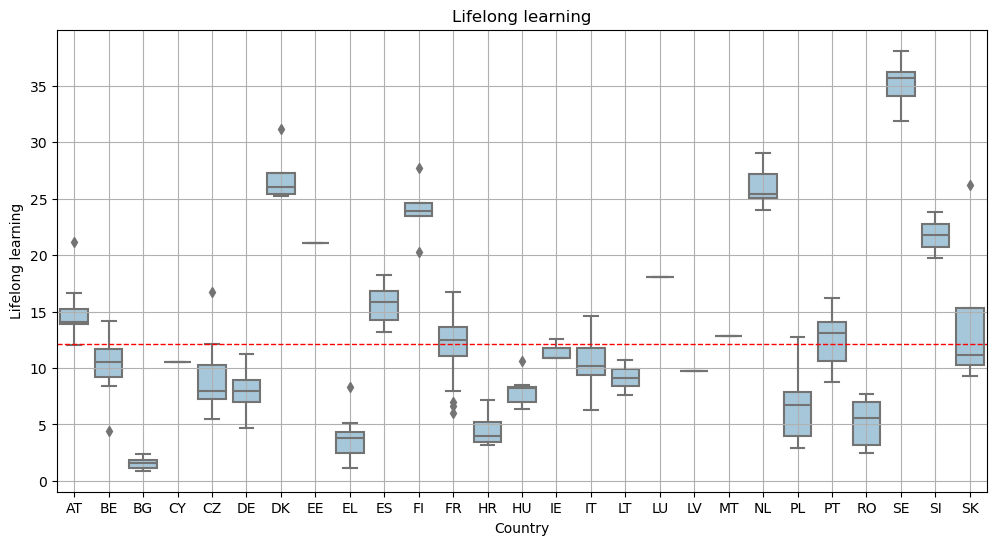

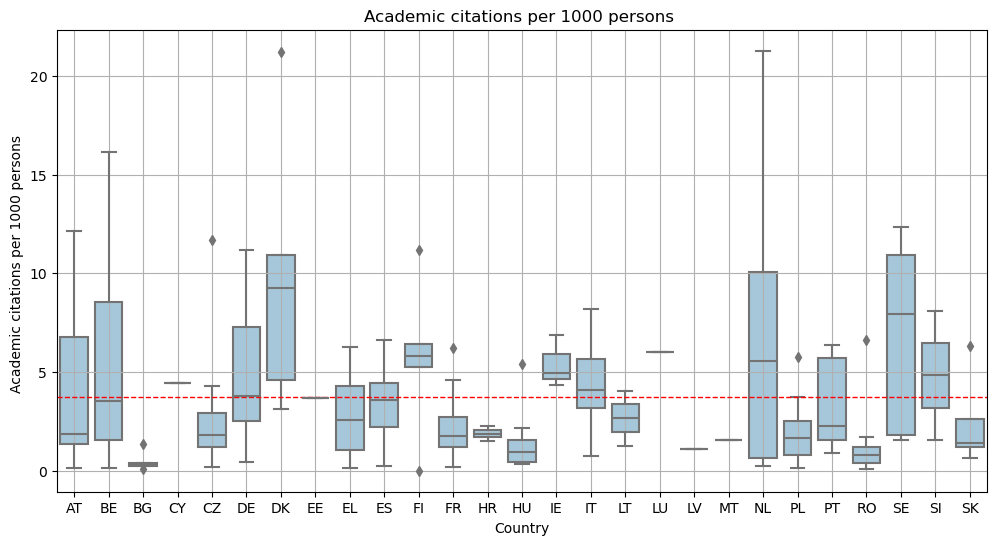

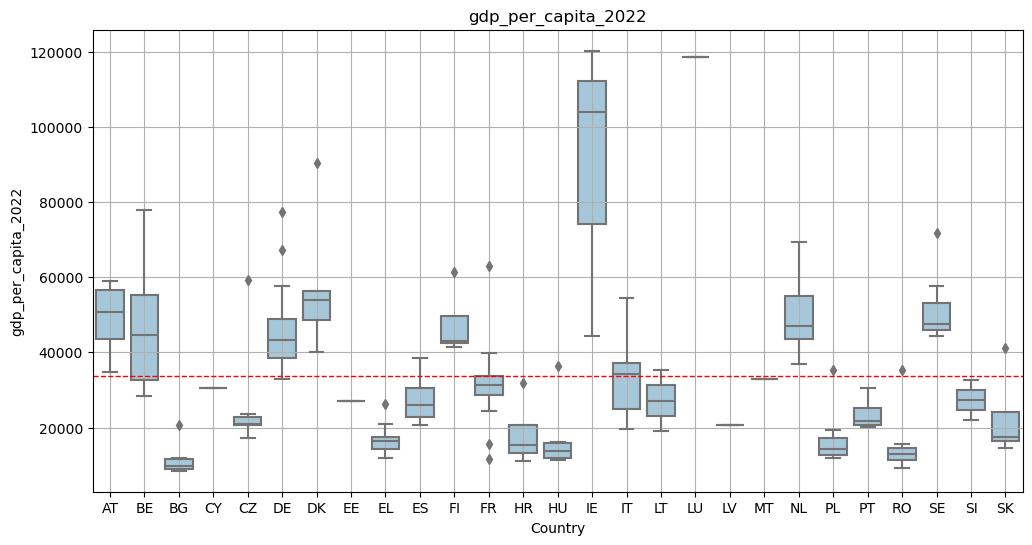

In [21]:
num_cols= df.select_dtypes(include=['float64', 'int64'])

country_col = 'Country'

print("Figura 00.7")

for col in num_cols:
    plt.figure(figsize=(12, 6))

    sns.boxplot(x='Country', y=col, data=df, color='#9ecae1')

    mean = df[col].mean()
    plt.axhline(mean, color='red', linestyle='--', linewidth=1, label=f'Media ({mean:.2f})')

    plt.title(col)

    plt.grid(True)

    plt.show()



In [22]:
print(outliers_df.Country.nunique())
outliers_df.RegionName.nunique()

11


31

Con Z Score se observan outliers en un total de 31 regiones de 11 paises. Es razonable pensar que existen unas pocas regiones por países con datos muy distantes a su media por distintas razones, geográficas o sociales

En el mapa observamos que la mayoría de los outliers se concentran en regiones muy especificas:

- Europa del Este: sobre todo Bulgaría, Rumanía y regiones adyacentes.
- Irlanda
- Territorios de ultramar de Francia y Portugal

A parte de estas tres zonas, se observan otras zonas muy repartidas sin sin relación aparente, al menos geográficamente

In [23]:
merged_gdf =pd.merge(gdf, outliers_df, how='right', left_on='NUTS_ID', right_on='NUTS code')


**[Figura 00.8]**

Figura 00.8


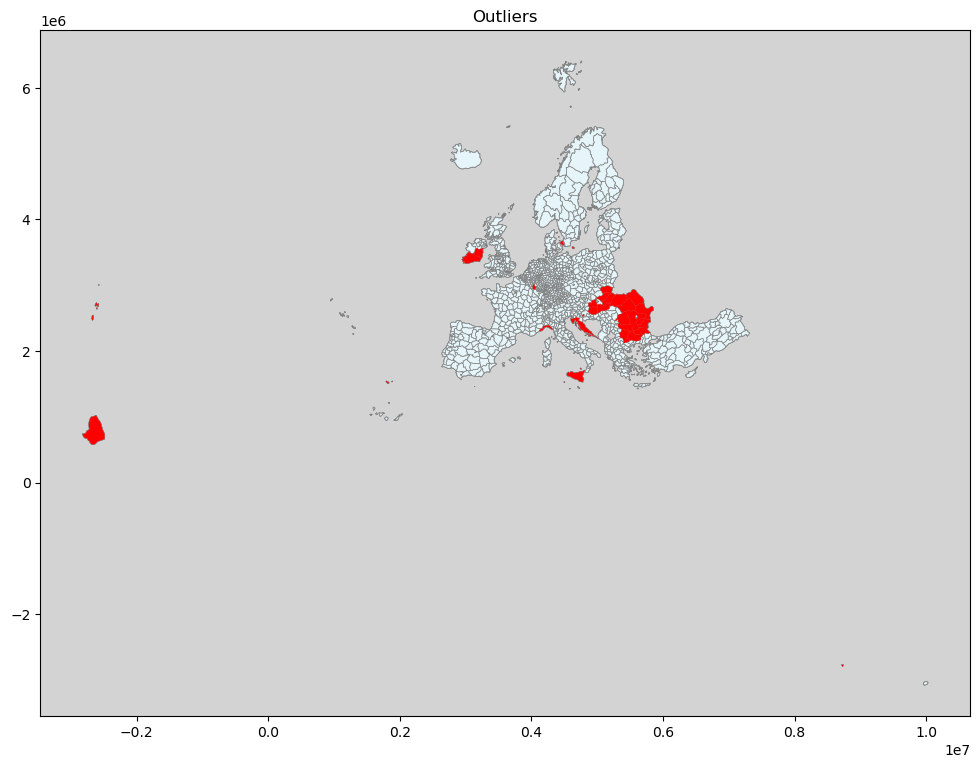

In [24]:
print("Figura 00.8")
fig, ax = plt.subplots(figsize=(12, 10))

ax.set_facecolor('lightgrey')

gdf.plot(ax=ax, color='#e5f5f9', edgecolor='gray', linewidth=0.5)  # Mapa base
merged_gdf.plot(ax=ax, color='red', markersize=50, label='Outliers')  # Outliers en rojo
ax.set_title('Outliers')

plt.show()

### Distribución de los indicadores

**[Figura 00.9]**

Figura 00.9


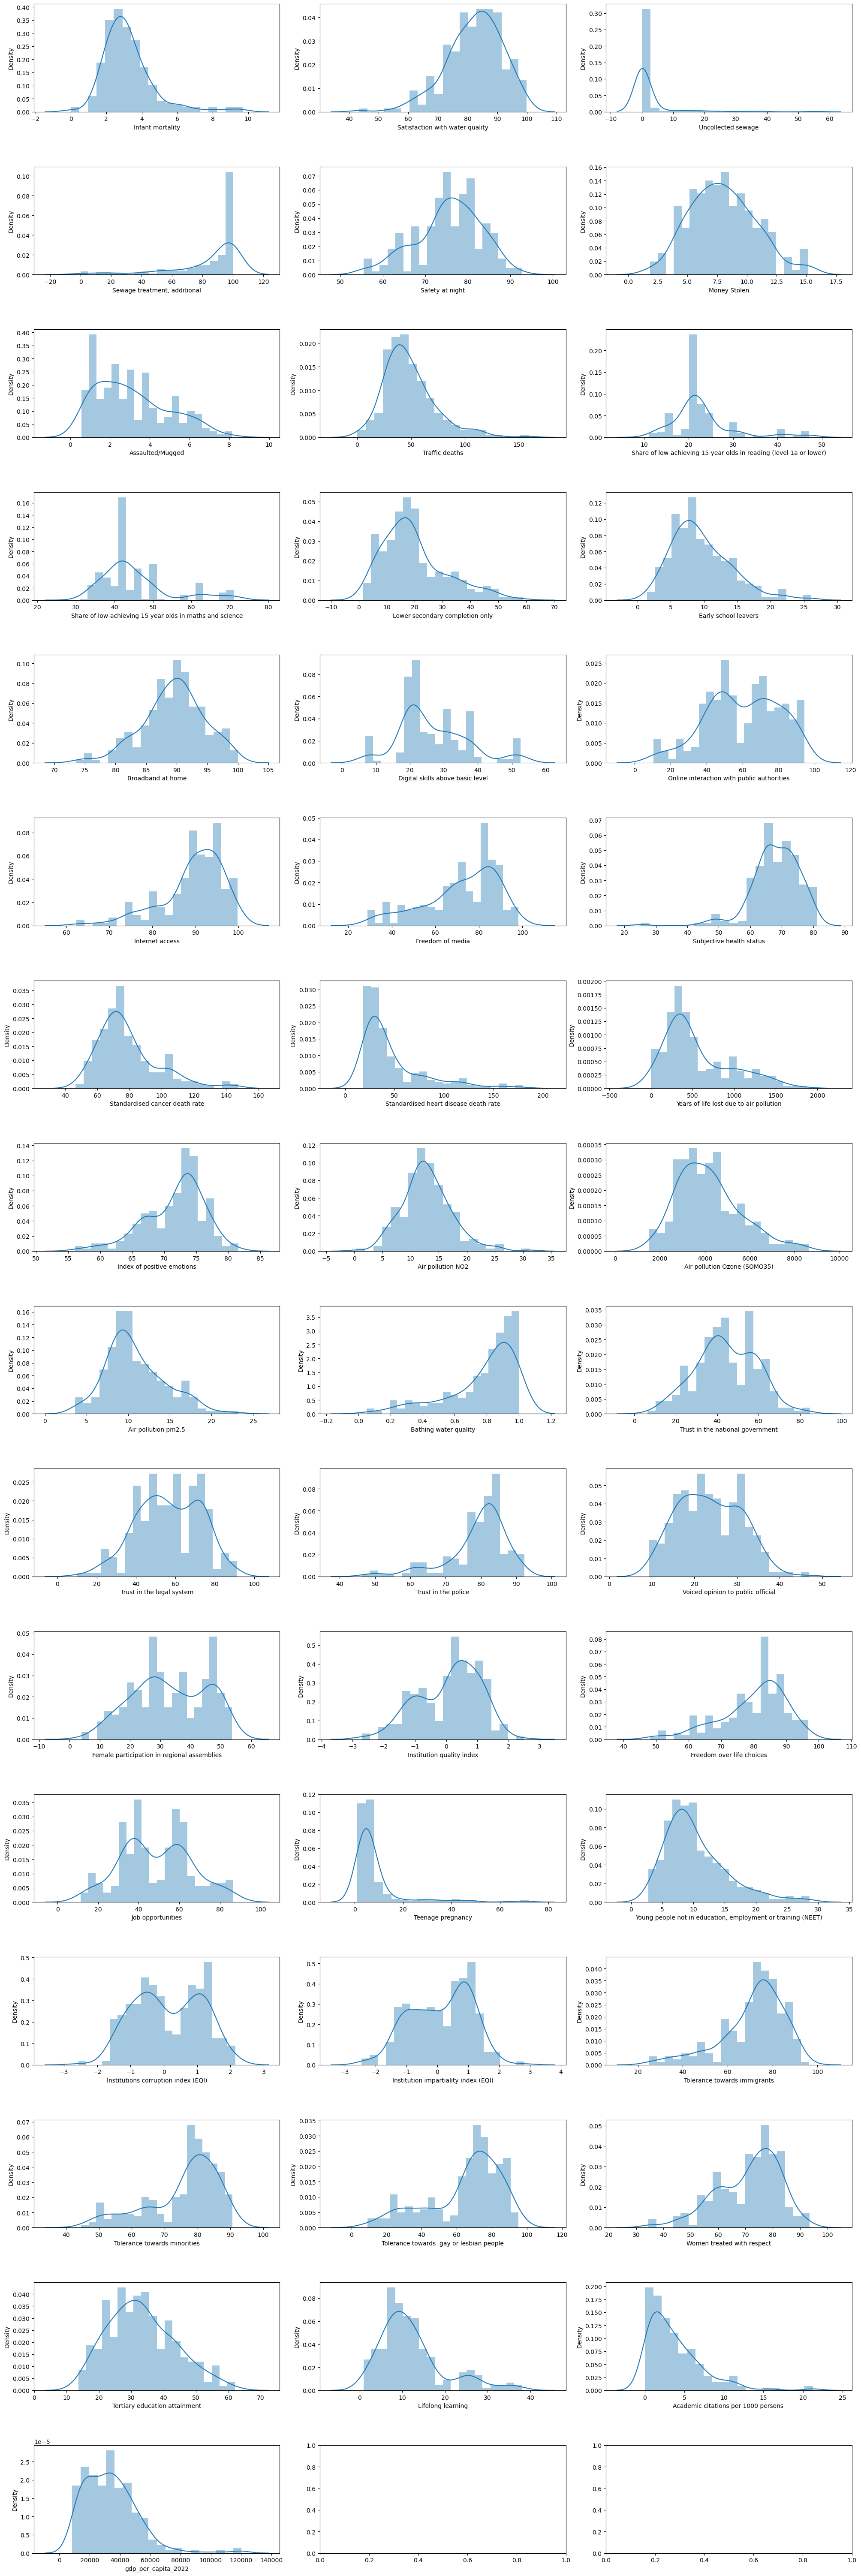

In [25]:
print("Figura 00.9")

num_cols = df.select_dtypes(include=['number']).columns

fig, axs = plt.subplots(ncols=3, nrows=16, figsize=(20, 60))
axs = axs.flatten()

index = 0
for col in df[num_cols]:
    sns.distplot(df[col], bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Correlación entre indicadores

**[Figura 00.10]**

Figura 00.10


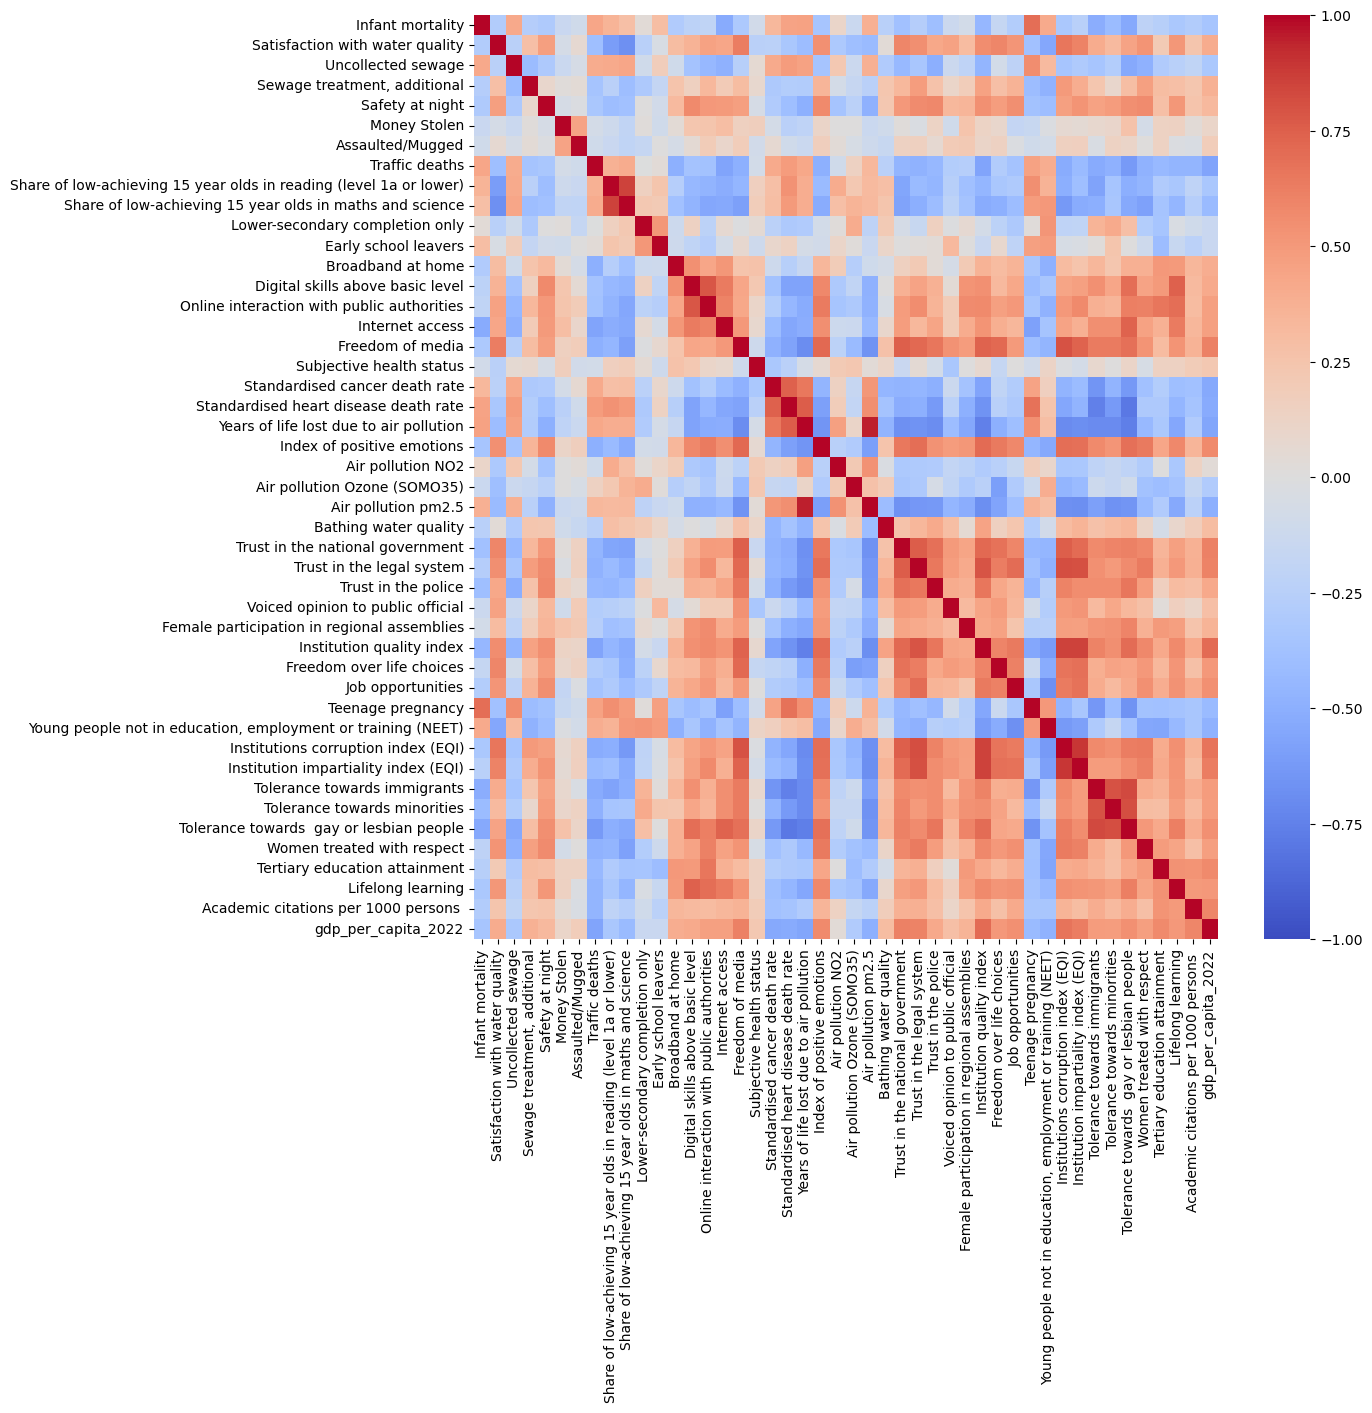

In [26]:
print("Figura 00.10")

num_col = df.select_dtypes(include='number')

correlation_matrix = num_col.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## Guardar el dataset

In [27]:
df.to_csv('00_lectura_datos.csv', index = False)